In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

from Chan import CChan
from ChanConfig import CChanConfig
from Common.CEnum import AUTYPE, DATA_SRC, KL_TYPE
from Plot.PlotDriver import CPlotDriver


In [44]:
code = "CRCL"
#begin_time = "2024-09-25"
begin_time = "2025-06-04"
#end_time = "2025-04-01"
end_time = None
data_src = DATA_SRC.YAHOO_FINANCE
#data_src = DATA_SRC.ALPHA_VANTAGE
lv_list = [KL_TYPE.K_5M]

config = CChanConfig({
    "cal_demark": True,
    "cal_kdj": True,
    "cal_dmi": True,
    "cal_rsi": True,
    "cal_rsl": True,
    "cal_demand_index": True,
    "cal_adline": True,
    "cal_bb_vals": True,
    "cal_kc_vals": True,
    "cal_starc_vals": True,
    "bi_strict": True,
    "trigger_step": True,
    "skip_step": 0,
    "divergence_rate": float("inf"),
    "bsp2_follow_1": True,
    "bsp3_follow_1": True,
    "min_zs_cnt": 0,
    "bs1_peak": True,
    "macd_algo": "peak",
    "bs_type": '1,2,3a,1p,2s,3b',
    "print_warning": True,
    "zs_algo": "normal",
})


In [45]:
plot_config = {
    "plot_kline": True,
    "plot_kline_combine": False,
    "plot_bi": True,
    "plot_seg": True,
    "plot_eigen": False,
    "plot_zs": True,
    "plot_macd": False,
    "plot_dmi": False,
    "plot_mean": False,
    "plot_channel": False,
    "plot_bsp": True,
    "plot_extrainfo": False,
    "plot_demark": False,
    "plot_marker": False,
    "plot_rsi": False,
    "plot_kdj": False,
    "plot_rsl": False,
    "plot_demand_index": False,
    "plot_adline": False,
    "plot_bollinger_bands": False,
    "plot_keltner_channel": False,
    "plot_starc": False,
}

plot_para = {
    "figure": {"x_range": 100000},
}


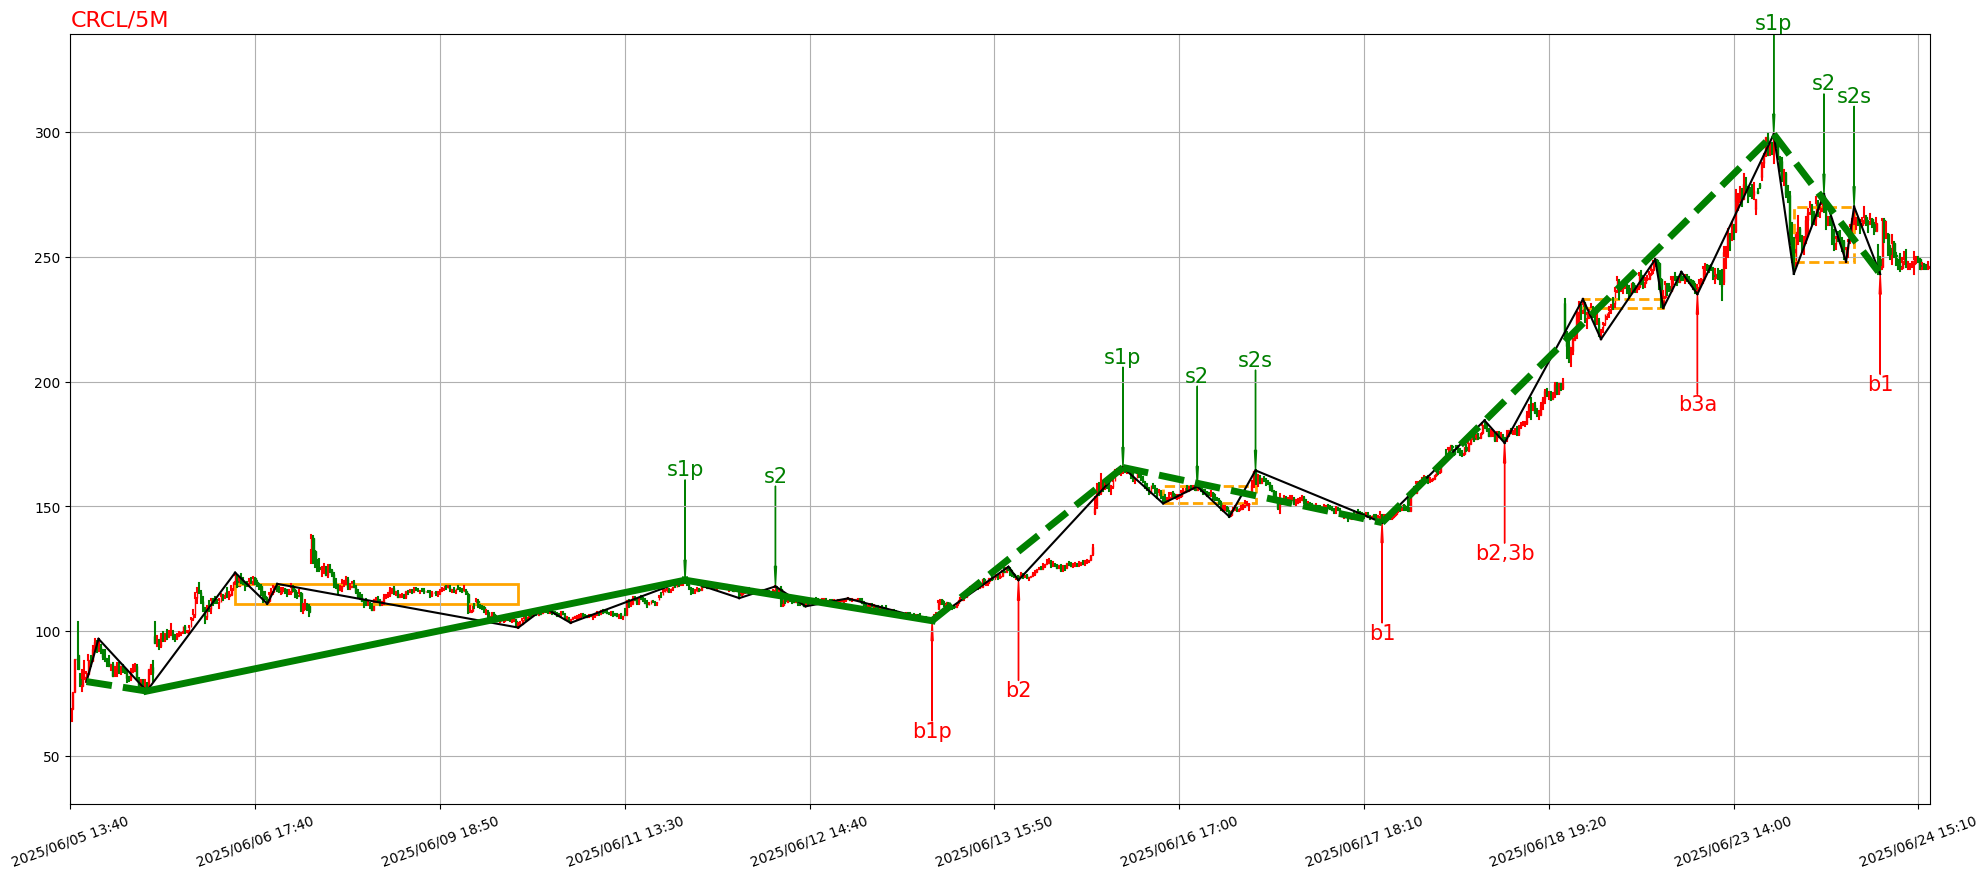

In [46]:
chan = CChan(
    code=code,
    begin_time=begin_time,
    end_time=end_time,
    data_src=data_src,
    lv_list=lv_list,
    config=config,
    autype=AUTYPE.QFQ,
)

# plot_driver = CPlotDriver(chan, plot_config=plot_config, plot_para=plot_para)
# plot_driver.save2img("./NVDA5m.png")
# plot_driver.figure.show()

from Plot.AnimatePlotDriver import CAnimateDriver
anim = CAnimateDriver(chan, plot_config=plot_config, plot_para=plot_para)
#anim.figure.show()

c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

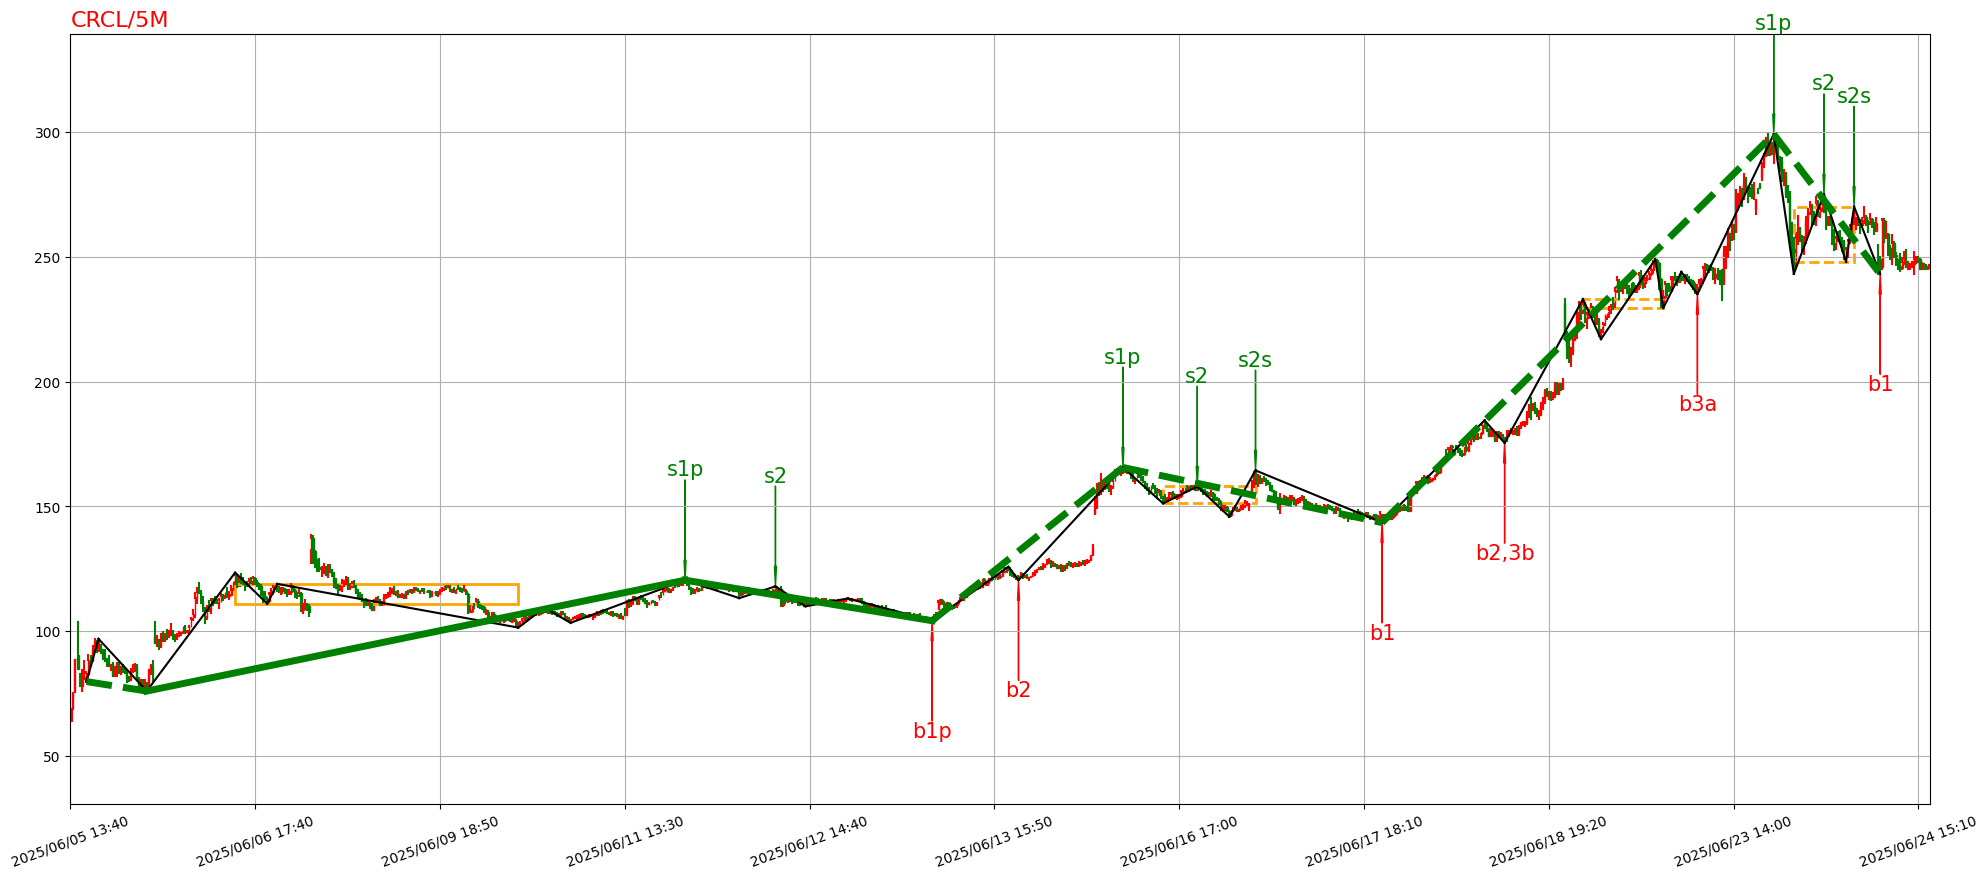

In [ ]:
code = "CRCL"
#begin_time = "2024-09-25"
begin_time = "2025-06-04"
#end_time = "2025-04-01"
end_time = None
data_src = DATA_SRC.YAHOO_FINANCE
#data_src = DATA_SRC.ALPHA_VANTAGE
lv_list = [KL_TYPE.K_5M]

config = CChanConfig({
    "cal_demark": True,
    "cal_kdj": True,
    "cal_dmi": True,
    "cal_rsi": True,
    "cal_rsl": True,
    "cal_demand_index": True,
    "cal_adline": True,
    "cal_bb_vals": True,
    "cal_kc_vals": True,
    "cal_starc_vals": True,
    "bi_strict": True,
    "trigger_step": False,
    "skip_step": 0,
    "divergence_rate": float("inf"),
    "bsp2_follow_1": True,
    "bsp3_follow_1": True,
    "min_zs_cnt": 0,
    "bs1_peak": True,
    "macd_algo": "peak",
    "bs_type": '1,2,3a,1p,2s,3b',
    "print_warning": True,
    "zs_algo": "normal",
})

chan = CChan(
    code=code,
    begin_time=begin_time,
    end_time=end_time,
    data_src=data_src,
    lv_list=lv_list,
    config=config,
    autype=AUTYPE.QFQ,
)

# lv = chan.lv_list[0]  # 最低级别，比如 KL_TYPE.K_60M
# klu_list = chan[lv].lst  # 或者 chan[0].klu_list
# print("K线数量：", len(klu_list))
# print("前10个K线收盘价：", [klu.close for klu in klu_list[:10]])
# TRIGGER STEP = TRUE



plot_driver = CPlotDriver(chan, plot_config=plot_config, plot_para=plot_para)
plot_driver.save2img("./NVDA5m.png")
plot_driver.figure.show()


In [ ]:
code = "^IXIC"
#begin_time = "2024-09-25"
begin_time = "2025-06-01"
#end_time = "2025-04-01"
end_time = None
data_src = DATA_SRC.YAHOO_FINANCE
#data_src = DATA_SRC.ALPHA_VANTAGE
lv_list = [KL_TYPE.K_1M]

config = CChanConfig({
    "cal_demark": True,
    "cal_kdj": True,
    "cal_dmi": True,
    "cal_rsi": True,
    "cal_rsl": True,
    "cal_demand_index": True,
    "cal_adline": True,
    "cal_bb_vals": True,
    "cal_kc_vals": True,
    "cal_starc_vals": True,
    "bi_strict": True,
    "trigger_step": True,
    "skip_step": 0,
    "divergence_rate": float("inf"),
    "bsp2_follow_1": True,
    "bsp3_follow_1": False,
    "min_zs_cnt": 0,
    "bs1_peak": False,
    "macd_algo": "peak",
    "bs_type": '1,2,3a,1p,2s,3b',
    "print_warning": True,
    "zs_algo": "normal",
})

chan = CChan(
    code=code,
    begin_time=begin_time,
    end_time=end_time,
    data_src=data_src,
    lv_list=lv_list,
    config=config,
    autype=AUTYPE.QFQ,
)

# plot_driver = CPlotDriver(chan, plot_config=plot_config, plot_para=plot_para)
# plot_driver.save2img("./NVDA5m.png")
# plot_driver.figure.show()

from Plot.AnimatePlotDriver import CAnimateDriver
anim = CAnimateDriver(chan, plot_config=plot_config, plot_para=plot_para)
#anim.figure.show()

In [ ]:
from utils.export_bs_features import export_bs_feature_files_by_type
export_bs_feature_files_by_type(chan, KL_TYPE.K_60M, "./output/NVDA_60m_bs_types")


In [ ]:
from utils.export_bs_features import export_bs_feature_files_by_type
from Chan import CChan
from Common.CEnum import KL_TYPE, DATA_SRC, AUTYPE
import pandas as pd
from ChanConfig import CChanConfig
import yfinance as yf
import os

# === Example ticker lists ===
sp500 = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]["Symbol"].tolist()
nasdaq100 = yf.Tickers(" ".join([
    "AAPL MSFT NVDA AMD GOOGL AMZN TSLA META NFLX INTC AVGO QCOM TXN MU ADI ORCL IBM"
])).tickers.keys()
dowjones = ["AAPL", "MSFT", "V", "UNH", "JNJ", "WMT", "JPM", "HD", "PG"]

# === Unified + deduplicated ===
tickers = sorted(set(sp500 + list(nasdaq100) + dowjones))
begin_time = "2025-06-18"
end_time = None
lv_list = [KL_TYPE.K_1M]
lv = KL_TYPE.K_1M
data_src = DATA_SRC.YAHOO_FINANCE
autype = AUTYPE.QFQ

# === 配置参数 ===
config = CChanConfig({
    "cal_demark": True,
    "cal_kdj": True,
    "cal_dmi": True,
    "cal_rsi": True,
    "cal_rsl": True,
    "cal_demand_index": True,
    "cal_adline": True,
    "cal_bb_vals": True,
    "cal_kc_vals": True,
    "cal_starc_vals": True,
    "bi_strict": True,
    "trigger_step": False,
    "skip_step": 0,
    "divergence_rate": float("inf"),
    "bsp2_follow_1": True,
    "bsp3_follow_1": False,
    "min_zs_cnt": 0,
    "bs1_peak": False,
    "macd_algo": "peak",
    "bs_type": '1,2,3a,1p,2s,3b',
    "print_warning": True,
    "zs_algo": "normal",
})

# === 输出主目录 ===
#main_output_dir = "./output/yfinance_day_bs_by_type"
main_output_dir = "./output/yfinance_1m_bs_by_type_06/25"
os.makedirs(main_output_dir, exist_ok=True)

# === 批量处理 ===
for code in tickers:
    try:
        print(f"\n[⏳] Processing: {code}")
        chan = CChan(
            code=code,
            begin_time=begin_time,
            end_time=end_time,
            data_src=data_src,
            lv_list=lv_list,
            config=config,
            autype=autype
        )

        output_dir = os.path.join(main_output_dir, f"{code}")
        export_bs_feature_files_by_type(chan, lv, output_dir)

    except Exception as e:
        print(f"[❌] Error processing {code}: {e}")





[⏳] Processing: A
YF.download() has changed argument auto_adjust default to True


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\A\bs_features_type_1p.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\A\bs_features_type_2.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\A\bs_features_type_2s.csv
[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\A\bs_features_type_3a.csv
[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\A\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\A\bs_features_type_3b.csv

[⏳] Processing: AAPL


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AAPL\bs_features_type_1.csv
[✓] Exported 12 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AAPL\bs_features_type_2.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AAPL\bs_features_type_2s.csv
[✓] Exported 6 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AAPL\bs_features_type_3a.csv
[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AAPL\bs_features_type_1p.csv

[⏳] Processing: ABBV


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ABBV\bs_features_type_1.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ABBV\bs_features_type_2.csv
[✓] Exported 13 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ABBV\bs_features_type_2s.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ABBV\bs_features_type_3b.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ABBV\bs_features_type_1p.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ABBV\bs_features_type_3a.csv

[⏳] Processing: ABNB


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ABNB\bs_features_type_1p.csv
[✓] Exported 13 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ABNB\bs_features_type_2.csv
[✓] Exported 17 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ABNB\bs_features_type_2s.csv
[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ABNB\bs_features_type_1.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ABNB\bs_features_type_3b.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ABNB\bs_features_type_3a.csv

[⏳] Processing: ABT


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ABT\bs_features_type_1.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ABT\bs_features_type_2.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ABT\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ABT\bs_features_type_3a.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ABT\bs_features_type_1p.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ABT\bs_features_type_3b.csv

[⏳] Processing: ACGL


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ACGL\bs_features_type_1.csv
[✓] Exported 12 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ACGL\bs_features_type_2.csv
[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ACGL\bs_features_type_1p.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ACGL\bs_features_type_2s.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ACGL\bs_features_type_3b.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ACGL\bs_features_type_3a.csv

[⏳] Processing: ACN


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 2 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ACN\bs_features_type_1p.csv
[✓] Exported 3 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ACN\bs_features_type_2.csv
[✓] Exported 5 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ACN\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ACN\bs_features_type_3a.csv
[✓] Exported 2 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ACN\bs_features_type_1.csv

[⏳] Processing: ADBE


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ADBE\bs_features_type_1p.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ADBE\bs_features_type_2.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ADBE\bs_features_type_2s.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ADBE\bs_features_type_1.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ADBE\bs_features_type_3b.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ADBE\bs_features_type_3a.csv

[⏳] Processing: ADI


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ADI\bs_features_type_1.csv
[✓] Exported 12 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ADI\bs_features_type_2.csv
[✓] Exported 14 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ADI\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ADI\bs_features_type_3a.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ADI\bs_features_type_3b.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ADI\bs_features_type_1p.csv

[⏳] Processing: ADM


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ADM\bs_features_type_1.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ADM\bs_features_type_2.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ADM\bs_features_type_3b.csv
[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ADM\bs_features_type_1p.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ADM\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ADM\bs_features_type_3a.csv

[⏳] Processing: ADP


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ADP\bs_features_type_1.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ADP\bs_features_type_2.csv
[✓] Exported 12 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ADP\bs_features_type_2s.csv
[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ADP\bs_features_type_1p.csv
[✓] Exported 4 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ADP\bs_features_type_3b.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ADP\bs_features_type_3a.csv

[⏳] Processing: ADSK


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ADSK\bs_features_type_1p.csv
[✓] Exported 12 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ADSK\bs_features_type_2.csv
[✓] Exported 10 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ADSK\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ADSK\bs_features_type_3a.csv
[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ADSK\bs_features_type_1.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ADSK\bs_features_type_3b.csv

[⏳] Processing: AEE


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 10 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AEE\bs_features_type_1p.csv
[✓] Exported 15 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AEE\bs_features_type_2.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AEE\bs_features_type_1.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AEE\bs_features_type_2s.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AEE\bs_features_type_3b.csv

[⏳] Processing: AEP


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AEP\bs_features_type_1p.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AEP\bs_features_type_2.csv
[✓] Exported 18 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AEP\bs_features_type_2s.csv
[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AEP\bs_features_type_1.csv
[✓] Exported 4 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AEP\bs_features_type_3b.csv

[⏳] Processing: AES


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AES\bs_features_type_1p.csv
[✓] Exported 6 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AES\bs_features_type_2.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AES\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AES\bs_features_type_3a.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AES\bs_features_type_3b.csv
[✓] Exported 1 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AES\bs_features_type_1.csv

[⏳] Processing: AFL


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AFL\bs_features_type_1.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AFL\bs_features_type_2.csv
[✓] Exported 8 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AFL\bs_features_type_1p.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AFL\bs_features_type_2s.csv
[✓] Exported 5 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AFL\bs_features_type_3a.csv

[⏳] Processing: AIG


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 8 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AIG\bs_features_type_1p.csv
[✓] Exported 13 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AIG\bs_features_type_2.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AIG\bs_features_type_2s.csv
[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AIG\bs_features_type_1.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AIG\bs_features_type_3b.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AIG\bs_features_type_3a.csv

[⏳] Processing: AIZ


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 2 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AIZ\bs_features_type_1p.csv
[✓] Exported 6 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AIZ\bs_features_type_2.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AIZ\bs_features_type_2s.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AIZ\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AIZ\bs_features_type_3b.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AIZ\bs_features_type_3a.csv

[⏳] Processing: AJG


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 9 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AJG\bs_features_type_1p.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AJG\bs_features_type_2.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AJG\bs_features_type_3a.csv
[✓] Exported 4 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AJG\bs_features_type_2s.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AJG\bs_features_type_3b.csv
[✓] Exported 2 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AJG\bs_features_type_1.csv

[⏳] Processing: AKAM


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AKAM\bs_features_type_1p.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AKAM\bs_features_type_2.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AKAM\bs_features_type_2s.csv
[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AKAM\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AKAM\bs_features_type_3b.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AKAM\bs_features_type_3a.csv

[⏳] Processing: ALB


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ALB\bs_features_type_1p.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ALB\bs_features_type_2.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ALB\bs_features_type_2s.csv
[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ALB\bs_features_type_3a.csv
[✓] Exported 2 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ALB\bs_features_type_1.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ALB\bs_features_type_3b.csv

[⏳] Processing: ALGN


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ALGN\bs_features_type_1p.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ALGN\bs_features_type_2.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ALGN\bs_features_type_2s.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ALGN\bs_features_type_3a.csv
[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ALGN\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ALGN\bs_features_type_3b.csv

[⏳] Processing: ALL


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ALL\bs_features_type_1.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ALL\bs_features_type_2.csv
[✓] Exported 5 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ALL\bs_features_type_3b.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ALL\bs_features_type_1p.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ALL\bs_features_type_2s.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ALL\bs_features_type_3a.csv

[⏳] Processing: ALLE


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ALLE\bs_features_type_1.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ALLE\bs_features_type_2.csv
[✓] Exported 11 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ALLE\bs_features_type_2s.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ALLE\bs_features_type_3a.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ALLE\bs_features_type_1p.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ALLE\bs_features_type_3b.csv

[⏳] Processing: AMAT


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 11 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AMAT\bs_features_type_1p.csv
[✓] Exported 19 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AMAT\bs_features_type_2.csv
[✓] Exported 15 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AMAT\bs_features_type_2s.csv
[✓] Exported 9 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AMAT\bs_features_type_1.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AMAT\bs_features_type_3a.csv

[⏳] Processing: AMCR


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AMCR\bs_features_type_1.csv
[✓] Exported 3 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AMCR\bs_features_type_2.csv
[✓] Exported 2 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AMCR\bs_features_type_2s.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AMCR\bs_features_type_3b.csv
[✓] Exported 1 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AMCR\bs_features_type_1p.csv

[⏳] Processing: AMD


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 11 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AMD\bs_features_type_1p.csv
[✓] Exported 14 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AMD\bs_features_type_2.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AMD\bs_features_type_1.csv
[✓] Exported 10 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AMD\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AMD\bs_features_type_3a.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AMD\bs_features_type_3b.csv

[⏳] Processing: AME


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AME\bs_features_type_3a.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AME\bs_features_type_1.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AME\bs_features_type_2.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AME\bs_features_type_3b.csv
[✓] Exported 5 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AME\bs_features_type_2s.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AME\bs_features_type_1p.csv

[⏳] Processing: AMGN


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AMGN\bs_features_type_1p.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AMGN\bs_features_type_2.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AMGN\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AMGN\bs_features_type_3a.csv
[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AMGN\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AMGN\bs_features_type_3b.csv

[⏳] Processing: AMP


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AMP\bs_features_type_1.csv
[✓] Exported 6 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AMP\bs_features_type_2.csv
[✓] Exported 3 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AMP\bs_features_type_2s.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AMP\bs_features_type_3a.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AMP\bs_features_type_1p.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AMP\bs_features_type_3b.csv

[⏳] Processing: AMT


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AMT\bs_features_type_1.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AMT\bs_features_type_2.csv
[✓] Exported 4 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AMT\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AMT\bs_features_type_3a.csv
[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AMT\bs_features_type_1p.csv

[⏳] Processing: AMZN


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AMZN\bs_features_type_1.csv
[✓] Exported 13 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AMZN\bs_features_type_2.csv
[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AMZN\bs_features_type_1p.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AMZN\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AMZN\bs_features_type_3a.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AMZN\bs_features_type_3b.csv

[⏳] Processing: ANET


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ANET\bs_features_type_3a.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ANET\bs_features_type_1.csv
[✓] Exported 6 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ANET\bs_features_type_2.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ANET\bs_features_type_3b.csv
[✓] Exported 2 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ANET\bs_features_type_1p.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ANET\bs_features_type_2s.csv

[⏳] Processing: ANSS


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 8 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ANSS\bs_features_type_1.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ANSS\bs_features_type_2.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ANSS\bs_features_type_3b.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ANSS\bs_features_type_2s.csv

[⏳] Processing: AON


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AON\bs_features_type_1.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AON\bs_features_type_2.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AON\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AON\bs_features_type_3a.csv
[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AON\bs_features_type_1p.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AON\bs_features_type_3b.csv

[⏳] Processing: AOS


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AOS\bs_features_type_1.csv
[✓] Exported 7 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AOS\bs_features_type_2.csv
[✓] Exported 10 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AOS\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AOS\bs_features_type_3a.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AOS\bs_features_type_1p.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AOS\bs_features_type_3b.csv

[⏳] Processing: APA


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\APA\bs_features_type_1p.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\APA\bs_features_type_2.csv
[✓] Exported 10 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\APA\bs_features_type_2s.csv
[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\APA\bs_features_type_3a.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\APA\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\APA\bs_features_type_3b.csv

[⏳] Processing: APD


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\APD\bs_features_type_1p.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\APD\bs_features_type_2.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\APD\bs_features_type_2s.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\APD\bs_features_type_1.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\APD\bs_features_type_3b.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\APD\bs_features_type_3a.csv

[⏳] Processing: APH


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\APH\bs_features_type_3a.csv
[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\APH\bs_features_type_1p.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\APH\bs_features_type_2.csv
[✓] Exported 12 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\APH\bs_features_type_2s.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\APH\bs_features_type_1.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\APH\bs_features_type_3b.csv

[⏳] Processing: APO


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\APO\bs_features_type_1.csv
[✓] Exported 14 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\APO\bs_features_type_2.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\APO\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\APO\bs_features_type_3a.csv
[✓] Exported 9 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\APO\bs_features_type_1p.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\APO\bs_features_type_3b.csv

[⏳] Processing: APTV


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\APTV\bs_features_type_3a.csv
[✓] Exported 8 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\APTV\bs_features_type_1p.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\APTV\bs_features_type_2.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\APTV\bs_features_type_2s.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\APTV\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\APTV\bs_features_type_3b.csv

[⏳] Processing: ARE


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 8 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ARE\bs_features_type_1p.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ARE\bs_features_type_2.csv
[✓] Exported 5 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ARE\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ARE\bs_features_type_3a.csv
[✓] Exported 1 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ARE\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ARE\bs_features_type_3b.csv

[⏳] Processing: ATO


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ATO\bs_features_type_1p.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ATO\bs_features_type_2.csv
[✓] Exported 11 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ATO\bs_features_type_2s.csv
[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ATO\bs_features_type_1.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ATO\bs_features_type_3b.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ATO\bs_features_type_3a.csv

[⏳] Processing: AVB


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AVB\bs_features_type_3a.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AVB\bs_features_type_1p.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AVB\bs_features_type_2.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AVB\bs_features_type_2s.csv
[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AVB\bs_features_type_1.csv

[⏳] Processing: AVGO


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AVGO\bs_features_type_3a.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AVGO\bs_features_type_1p.csv
[✓] Exported 13 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AVGO\bs_features_type_2.csv
[✓] Exported 22 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AVGO\bs_features_type_2s.csv
[✓] Exported 8 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AVGO\bs_features_type_1.csv

[⏳] Processing: AVY


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AVY\bs_features_type_1p.csv
[✓] Exported 5 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AVY\bs_features_type_2.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AVY\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AVY\bs_features_type_3a.csv
[✓] Exported 1 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AVY\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AVY\bs_features_type_3b.csv

[⏳] Processing: AWK


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AWK\bs_features_type_1p.csv
[✓] Exported 12 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AWK\bs_features_type_2.csv
[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AWK\bs_features_type_1.csv
[✓] Exported 12 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AWK\bs_features_type_2s.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AWK\bs_features_type_3b.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AWK\bs_features_type_3a.csv

[⏳] Processing: AXON


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 8 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AXON\bs_features_type_1p.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AXON\bs_features_type_2.csv
[✓] Exported 4 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AXON\bs_features_type_2s.csv
[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AXON\bs_features_type_1.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AXON\bs_features_type_3b.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AXON\bs_features_type_3a.csv

[⏳] Processing: AXP


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AXP\bs_features_type_1.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AXP\bs_features_type_2.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AXP\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AXP\bs_features_type_3a.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AXP\bs_features_type_1p.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AXP\bs_features_type_3b.csv

[⏳] Processing: AZO


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 2 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AZO\bs_features_type_1.csv
[✓] Exported 3 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AZO\bs_features_type_2.csv
[✓] Exported 2 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AZO\bs_features_type_2s.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AZO\bs_features_type_3b.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AZO\bs_features_type_3a.csv
[✓] Exported 2 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\AZO\bs_features_type_1p.csv

[⏳] Processing: BA


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BA\bs_features_type_1p.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BA\bs_features_type_2.csv
[✓] Exported 15 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BA\bs_features_type_2s.csv
[✓] Exported 9 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BA\bs_features_type_1.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BA\bs_features_type_3b.csv
[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BA\bs_features_type_3a.csv

[⏳] Processing: BAC


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BAC\bs_features_type_1p.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BAC\bs_features_type_2.csv
[✓] Exported 3 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BAC\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BAC\bs_features_type_3a.csv
[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BAC\bs_features_type_1.csv

[⏳] Processing: BALL


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BALL\bs_features_type_1.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BALL\bs_features_type_2.csv
[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BALL\bs_features_type_1p.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BALL\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BALL\bs_features_type_3a.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BALL\bs_features_type_3b.csv

[⏳] Processing: BAX


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BAX\bs_features_type_1p.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BAX\bs_features_type_2.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BAX\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BAX\bs_features_type_3a.csv
[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BAX\bs_features_type_1.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BAX\bs_features_type_3b.csv

[⏳] Processing: BBY


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 11 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BBY\bs_features_type_1p.csv
[✓] Exported 14 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BBY\bs_features_type_2.csv
[✓] Exported 10 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BBY\bs_features_type_2s.csv
[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BBY\bs_features_type_3a.csv
[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BBY\bs_features_type_1.csv
[✓] Exported 5 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BBY\bs_features_type_3b.csv

[⏳] Processing: BDX


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 8 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BDX\bs_features_type_1.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BDX\bs_features_type_3a.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BDX\bs_features_type_1p.csv
[✓] Exported 13 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BDX\bs_features_type_2.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BDX\bs_features_type_2s.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BDX\bs_features_type_3b.csv

[⏳] Processing: BEN


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BEN\bs_features_type_1.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BEN\bs_features_type_2s.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BEN\bs_features_type_3a.csv
[✓] Exported 4 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BEN\bs_features_type_2.csv
[✓] Exported 2 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BEN\bs_features_type_1p.csv

[⏳] Processing: BF.B
[❌] Error processing BF.B: yfinance returned no data for symbol: BF.B

[⏳] Processing: BG


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BG\bs_features_type_1p.csv
[✓] Exported 7 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BG\bs_features_type_2.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BG\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BG\bs_features_type_3a.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BG\bs_features_type_3b.csv
[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BG\bs_features_type_1.csv

[⏳] Processing: BIIB


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 9 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BIIB\bs_features_type_1p.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BIIB\bs_features_type_2.csv
[✓] Exported 5 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BIIB\bs_features_type_2s.csv
[✓] Exported 2 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BIIB\bs_features_type_1.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BIIB\bs_features_type_3a.csv

[⏳] Processing: BK


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 2 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BK\bs_features_type_1p.csv
[✓] Exported 5 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BK\bs_features_type_2.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BK\bs_features_type_3a.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BK\bs_features_type_1.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BK\bs_features_type_3b.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BK\bs_features_type_2s.csv

[⏳] Processing: BKNG


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 2 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BKNG\bs_features_type_1p.csv
[✓] Exported 2 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BKNG\bs_features_type_2.csv
[✓] Exported 4 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BKNG\bs_features_type_2s.csv
[✓] Exported 1 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BKNG\bs_features_type_1.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BKNG\bs_features_type_3a.csv

[⏳] Processing: BKR


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BKR\bs_features_type_3a.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BKR\bs_features_type_1.csv
[✓] Exported 13 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BKR\bs_features_type_2.csv
[✓] Exported 9 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BKR\bs_features_type_1p.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BKR\bs_features_type_2s.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BKR\bs_features_type_3b.csv

[⏳] Processing: BLDR


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BLDR\bs_features_type_3a.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BLDR\bs_features_type_1p.csv
[✓] Exported 6 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BLDR\bs_features_type_2.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BLDR\bs_features_type_3b.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BLDR\bs_features_type_2s.csv
[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BLDR\bs_features_type_1.csv

[⏳] Processing: BLK


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BLK\bs_features_type_1.csv
[✓] Exported 7 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BLK\bs_features_type_2.csv
[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BLK\bs_features_type_1p.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BLK\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BLK\bs_features_type_3a.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BLK\bs_features_type_3b.csv

[⏳] Processing: BMY


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BMY\bs_features_type_3a.csv
[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BMY\bs_features_type_1.csv
[✓] Exported 13 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BMY\bs_features_type_2.csv
[✓] Exported 8 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BMY\bs_features_type_1p.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BMY\bs_features_type_2s.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BMY\bs_features_type_3b.csv

[⏳] Processing: BR


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BR\bs_features_type_1.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BR\bs_features_type_2.csv
[✓] Exported 10 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BR\bs_features_type_2s.csv
[✓] Exported 4 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BR\bs_features_type_3b.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BR\bs_features_type_3a.csv
[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BR\bs_features_type_1p.csv

[⏳] Processing: BRK.B



1 Failed download:
['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')


[❌] Error processing BRK.B: yfinance returned no data for symbol: BRK.B

[⏳] Processing: BRO


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BRO\bs_features_type_1.csv
[✓] Exported 12 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BRO\bs_features_type_2.csv
[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BRO\bs_features_type_1p.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BRO\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BRO\bs_features_type_3a.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BRO\bs_features_type_3b.csv

[⏳] Processing: BSX


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BSX\bs_features_type_1.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BSX\bs_features_type_2.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BSX\bs_features_type_2s.csv
[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BSX\bs_features_type_1p.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BSX\bs_features_type_3b.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BSX\bs_features_type_3a.csv

[⏳] Processing: BX


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BX\bs_features_type_1.csv
[✓] Exported 7 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BX\bs_features_type_2.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BX\bs_features_type_2s.csv
[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BX\bs_features_type_3a.csv
[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BX\bs_features_type_1p.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BX\bs_features_type_3b.csv

[⏳] Processing: BXP


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BXP\bs_features_type_1p.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BXP\bs_features_type_2.csv
[✓] Exported 4 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BXP\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BXP\bs_features_type_3a.csv
[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BXP\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\BXP\bs_features_type_3b.csv

[⏳] Processing: C


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 8 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\C\bs_features_type_1p.csv
[✓] Exported 14 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\C\bs_features_type_2.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\C\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\C\bs_features_type_3a.csv
[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\C\bs_features_type_1.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\C\bs_features_type_3b.csv

[⏳] Processing: CAG


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CAG\bs_features_type_3a.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CAG\bs_features_type_1p.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CAG\bs_features_type_2.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CAG\bs_features_type_2s.csv
[✓] Exported 8 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CAG\bs_features_type_1.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CAG\bs_features_type_3b.csv

[⏳] Processing: CAH


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CAH\bs_features_type_3a.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CAH\bs_features_type_1p.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CAH\bs_features_type_2.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CAH\bs_features_type_2s.csv
[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CAH\bs_features_type_1.csv
[✓] Exported 4 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CAH\bs_features_type_3b.csv

[⏳] Processing: CARR


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 11 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CARR\bs_features_type_1p.csv
[✓] Exported 12 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CARR\bs_features_type_2.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CARR\bs_features_type_2s.csv
[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CARR\bs_features_type_3a.csv
[✓] Exported 2 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CARR\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CARR\bs_features_type_3b.csv

[⏳] Processing: CAT


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CAT\bs_features_type_1p.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CAT\bs_features_type_2.csv
[✓] Exported 5 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CAT\bs_features_type_2s.csv
[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CAT\bs_features_type_1.csv
[✓] Exported 5 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CAT\bs_features_type_3b.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CAT\bs_features_type_3a.csv

[⏳] Processing: CB


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 8 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CB\bs_features_type_1p.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CB\bs_features_type_2.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CB\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CB\bs_features_type_3a.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CB\bs_features_type_1.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CB\bs_features_type_3b.csv

[⏳] Processing: CBOE


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CBOE\bs_features_type_1p.csv
[✓] Exported 6 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CBOE\bs_features_type_2.csv
[✓] Exported 2 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CBOE\bs_features_type_1.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CBOE\bs_features_type_3b.csv
[✓] Exported 5 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CBOE\bs_features_type_2s.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CBOE\bs_features_type_3a.csv

[⏳] Processing: CBRE


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CBRE\bs_features_type_1p.csv
[✓] Exported 6 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CBRE\bs_features_type_2.csv
[✓] Exported 4 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CBRE\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CBRE\bs_features_type_3a.csv
[✓] Exported 1 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CBRE\bs_features_type_1.csv

[⏳] Processing: CCI


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CCI\bs_features_type_1.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CCI\bs_features_type_2.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CCI\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CCI\bs_features_type_3a.csv
[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CCI\bs_features_type_1p.csv

[⏳] Processing: CCL


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 9 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CCL\bs_features_type_1p.csv
[✓] Exported 12 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CCL\bs_features_type_2.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CCL\bs_features_type_3b.csv
[✓] Exported 12 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CCL\bs_features_type_2s.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CCL\bs_features_type_1.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CCL\bs_features_type_3a.csv

[⏳] Processing: CDNS


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CDNS\bs_features_type_3a.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CDNS\bs_features_type_1.csv
[✓] Exported 12 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CDNS\bs_features_type_2.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CDNS\bs_features_type_2s.csv
[✓] Exported 8 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CDNS\bs_features_type_1p.csv

[⏳] Processing: CDW


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CDW\bs_features_type_3a.csv
[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CDW\bs_features_type_1.csv
[✓] Exported 5 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CDW\bs_features_type_2.csv
[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CDW\bs_features_type_1p.csv
[✓] Exported 3 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CDW\bs_features_type_2s.csv

[⏳] Processing: CEG


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 8 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CEG\bs_features_type_1.csv
[✓] Exported 12 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CEG\bs_features_type_2.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CEG\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CEG\bs_features_type_3a.csv
[✓] Exported 4 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CEG\bs_features_type_3b.csv
[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CEG\bs_features_type_1p.csv

[⏳] Processing: CF


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CF\bs_features_type_1p.csv
[✓] Exported 7 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CF\bs_features_type_2.csv
[✓] Exported 11 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CF\bs_features_type_2s.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CF\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CF\bs_features_type_3b.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CF\bs_features_type_3a.csv

[⏳] Processing: CFG


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CFG\bs_features_type_1p.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CFG\bs_features_type_2.csv
[✓] Exported 10 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CFG\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CFG\bs_features_type_3a.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CFG\bs_features_type_1.csv

[⏳] Processing: CHD


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CHD\bs_features_type_1.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CHD\bs_features_type_2.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CHD\bs_features_type_3a.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CHD\bs_features_type_1p.csv
[✓] Exported 12 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CHD\bs_features_type_2s.csv

[⏳] Processing: CHRW


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CHRW\bs_features_type_1.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CHRW\bs_features_type_2.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CHRW\bs_features_type_3b.csv
[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CHRW\bs_features_type_1p.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CHRW\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CHRW\bs_features_type_3a.csv

[⏳] Processing: CHTR


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CHTR\bs_features_type_1p.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CHTR\bs_features_type_2.csv
[✓] Exported 12 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CHTR\bs_features_type_2s.csv
[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CHTR\bs_features_type_3a.csv
[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CHTR\bs_features_type_1.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CHTR\bs_features_type_3b.csv

[⏳] Processing: CI


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CI\bs_features_type_1p.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CI\bs_features_type_2.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CI\bs_features_type_2s.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CI\bs_features_type_3a.csv
[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CI\bs_features_type_1.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CI\bs_features_type_3b.csv

[⏳] Processing: CINF


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CINF\bs_features_type_1.csv
[✓] Exported 7 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CINF\bs_features_type_2.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CINF\bs_features_type_3a.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CINF\bs_features_type_1p.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CINF\bs_features_type_2s.csv

[⏳] Processing: CL


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 8 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CL\bs_features_type_1p.csv
[✓] Exported 14 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CL\bs_features_type_2.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CL\bs_features_type_2s.csv
[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CL\bs_features_type_1.csv
[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CL\bs_features_type_3a.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CL\bs_features_type_3b.csv

[⏳] Processing: CLX


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 13 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CLX\bs_features_type_1p.csv
[✓] Exported 14 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CLX\bs_features_type_2.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CLX\bs_features_type_2s.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CLX\bs_features_type_3a.csv
[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CLX\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CLX\bs_features_type_3b.csv

[⏳] Processing: CMCSA


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CMCSA\bs_features_type_1.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CMCSA\bs_features_type_2.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CMCSA\bs_features_type_3b.csv
[✓] Exported 14 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CMCSA\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CMCSA\bs_features_type_3a.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CMCSA\bs_features_type_1p.csv

[⏳] Processing: CME


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 8 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CME\bs_features_type_1.csv
[✓] Exported 13 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CME\bs_features_type_2.csv
[✓] Exported 12 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CME\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CME\bs_features_type_3a.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CME\bs_features_type_3b.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CME\bs_features_type_1p.csv

[⏳] Processing: CMG


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CMG\bs_features_type_1.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CMG\bs_features_type_2.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CMG\bs_features_type_3b.csv
[✓] Exported 8 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CMG\bs_features_type_1p.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CMG\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CMG\bs_features_type_3a.csv

[⏳] Processing: CMI


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CMI\bs_features_type_1p.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CMI\bs_features_type_2.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CMI\bs_features_type_2s.csv
[✓] Exported 5 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CMI\bs_features_type_3a.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CMI\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CMI\bs_features_type_3b.csv

[⏳] Processing: CMS


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CMS\bs_features_type_1.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CMS\bs_features_type_2.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CMS\bs_features_type_1p.csv
[✓] Exported 11 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CMS\bs_features_type_2s.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CMS\bs_features_type_3b.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CMS\bs_features_type_3a.csv

[⏳] Processing: CNC


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CNC\bs_features_type_1p.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CNC\bs_features_type_2.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CNC\bs_features_type_2s.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CNC\bs_features_type_1.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CNC\bs_features_type_3a.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CNC\bs_features_type_3b.csv

[⏳] Processing: CNP


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 9 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CNP\bs_features_type_1p.csv
[✓] Exported 13 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CNP\bs_features_type_2.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CNP\bs_features_type_2s.csv
[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CNP\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CNP\bs_features_type_3b.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CNP\bs_features_type_3a.csv

[⏳] Processing: COF


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\COF\bs_features_type_3a.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\COF\bs_features_type_1.csv
[✓] Exported 7 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\COF\bs_features_type_2.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\COF\bs_features_type_2s.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\COF\bs_features_type_1p.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\COF\bs_features_type_3b.csv

[⏳] Processing: COIN


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\COIN\bs_features_type_1p.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\COIN\bs_features_type_2.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\COIN\bs_features_type_2s.csv
[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\COIN\bs_features_type_3a.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\COIN\bs_features_type_3b.csv
[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\COIN\bs_features_type_1.csv

[⏳] Processing: COO


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\COO\bs_features_type_1p.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\COO\bs_features_type_2.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\COO\bs_features_type_1.csv
[✓] Exported 5 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\COO\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\COO\bs_features_type_3a.csv

[⏳] Processing: COP


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\COP\bs_features_type_1p.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\COP\bs_features_type_2.csv
[✓] Exported 11 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\COP\bs_features_type_2s.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\COP\bs_features_type_1.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\COP\bs_features_type_3a.csv

[⏳] Processing: COR


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\COR\bs_features_type_1p.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\COR\bs_features_type_2.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\COR\bs_features_type_2s.csv
[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\COR\bs_features_type_1.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\COR\bs_features_type_3a.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\COR\bs_features_type_3b.csv

[⏳] Processing: COST


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\COST\bs_features_type_1p.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\COST\bs_features_type_2.csv
[✓] Exported 10 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\COST\bs_features_type_2s.csv
[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\COST\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\COST\bs_features_type_3b.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\COST\bs_features_type_3a.csv

[⏳] Processing: CPAY


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CPAY\bs_features_type_3a.csv
[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CPAY\bs_features_type_1p.csv
[✓] Exported 5 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CPAY\bs_features_type_2.csv
[✓] Exported 1 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CPAY\bs_features_type_2s.csv
[✓] Exported 1 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CPAY\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CPAY\bs_features_type_3b.csv

[⏳] Processing: CPB


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 8 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CPB\bs_features_type_1p.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CPB\bs_features_type_2.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CPB\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CPB\bs_features_type_3a.csv
[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CPB\bs_features_type_1.csv

[⏳] Processing: CPRT


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CPRT\bs_features_type_1p.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CPRT\bs_features_type_2.csv
[✓] Exported 13 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CPRT\bs_features_type_2s.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CPRT\bs_features_type_1.csv
[✓] Exported 5 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CPRT\bs_features_type_3a.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CPRT\bs_features_type_3b.csv

[⏳] Processing: CPT


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CPT\bs_features_type_1p.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CPT\bs_features_type_2.csv
[✓] Exported 10 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CPT\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CPT\bs_features_type_3a.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CPT\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CPT\bs_features_type_3b.csv

[⏳] Processing: CRL


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 2 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CRL\bs_features_type_1p.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CRL\bs_features_type_2.csv
[✓] Exported 11 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CRL\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CRL\bs_features_type_3a.csv
[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CRL\bs_features_type_1.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CRL\bs_features_type_3b.csv

[⏳] Processing: CRM


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CRM\bs_features_type_3a.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CRM\bs_features_type_1.csv
[✓] Exported 12 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CRM\bs_features_type_2.csv
[✓] Exported 8 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CRM\bs_features_type_1p.csv
[✓] Exported 11 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CRM\bs_features_type_2s.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CRM\bs_features_type_3b.csv

[⏳] Processing: CRWD


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 9 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CRWD\bs_features_type_1p.csv
[✓] Exported 12 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CRWD\bs_features_type_2.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CRWD\bs_features_type_2s.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CRWD\bs_features_type_1.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CRWD\bs_features_type_3b.csv

[⏳] Processing: CSCO


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CSCO\bs_features_type_1p.csv
[✓] Exported 14 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CSCO\bs_features_type_2.csv
[✓] Exported 10 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CSCO\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CSCO\bs_features_type_3a.csv
[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CSCO\bs_features_type_1.csv
[✓] Exported 4 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CSCO\bs_features_type_3b.csv

[⏳] Processing: CSGP


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CSGP\bs_features_type_1.csv
[✓] Exported 13 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CSGP\bs_features_type_2.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CSGP\bs_features_type_3b.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CSGP\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CSGP\bs_features_type_3a.csv
[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CSGP\bs_features_type_1p.csv

[⏳] Processing: CSX


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CSX\bs_features_type_1.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CSX\bs_features_type_2.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CSX\bs_features_type_3b.csv
[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CSX\bs_features_type_1p.csv
[✓] Exported 2 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CSX\bs_features_type_2s.csv

[⏳] Processing: CTAS


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CTAS\bs_features_type_3a.csv
[✓] Exported 10 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CTAS\bs_features_type_1p.csv
[✓] Exported 14 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CTAS\bs_features_type_2.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CTAS\bs_features_type_1.csv
[✓] Exported 5 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CTAS\bs_features_type_2s.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CTAS\bs_features_type_3b.csv

[⏳] Processing: CTRA


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CTRA\bs_features_type_1.csv
[✓] Exported 13 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CTRA\bs_features_type_2.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CTRA\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CTRA\bs_features_type_3a.csv
[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CTRA\bs_features_type_1p.csv

[⏳] Processing: CTSH


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CTSH\bs_features_type_1p.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CTSH\bs_features_type_2.csv
[✓] Exported 11 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CTSH\bs_features_type_2s.csv
[✓] Exported 9 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CTSH\bs_features_type_1.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CTSH\bs_features_type_3b.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CTSH\bs_features_type_3a.csv

[⏳] Processing: CTVA


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CTVA\bs_features_type_1p.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CTVA\bs_features_type_2.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CTVA\bs_features_type_2s.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CTVA\bs_features_type_1.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CTVA\bs_features_type_3a.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CTVA\bs_features_type_3b.csv

[⏳] Processing: CVS


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CVS\bs_features_type_1.csv
[✓] Exported 12 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CVS\bs_features_type_2.csv
[✓] Exported 14 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CVS\bs_features_type_2s.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CVS\bs_features_type_3b.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CVS\bs_features_type_3a.csv
[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CVS\bs_features_type_1p.csv

[⏳] Processing: CVX


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 11 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CVX\bs_features_type_1p.csv
[✓] Exported 13 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CVX\bs_features_type_2.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CVX\bs_features_type_2s.csv
[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CVX\bs_features_type_1.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CVX\bs_features_type_3a.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CVX\bs_features_type_3b.csv

[⏳] Processing: CZR


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 9 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CZR\bs_features_type_1p.csv
[✓] Exported 14 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CZR\bs_features_type_2.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CZR\bs_features_type_2s.csv
[✓] Exported 5 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CZR\bs_features_type_3a.csv
[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CZR\bs_features_type_1.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\CZR\bs_features_type_3b.csv

[⏳] Processing: D


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 9 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\D\bs_features_type_1p.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\D\bs_features_type_2.csv
[✓] Exported 10 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\D\bs_features_type_2s.csv
[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\D\bs_features_type_1.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\D\bs_features_type_3a.csv

[⏳] Processing: DAL


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 11 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DAL\bs_features_type_1p.csv
[✓] Exported 13 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DAL\bs_features_type_2.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DAL\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DAL\bs_features_type_3a.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DAL\bs_features_type_3b.csv
[✓] Exported 2 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DAL\bs_features_type_1.csv

[⏳] Processing: DASH


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DASH\bs_features_type_1.csv
[✓] Exported 12 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DASH\bs_features_type_2.csv
[✓] Exported 10 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DASH\bs_features_type_1p.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DASH\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DASH\bs_features_type_3a.csv

[⏳] Processing: DAY


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DAY\bs_features_type_1p.csv
[✓] Exported 7 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DAY\bs_features_type_2.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DAY\bs_features_type_3a.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DAY\bs_features_type_1.csv
[✓] Exported 11 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DAY\bs_features_type_2s.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DAY\bs_features_type_3b.csv

[⏳] Processing: DD


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DD\bs_features_type_1.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DD\bs_features_type_2.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DD\bs_features_type_2s.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DD\bs_features_type_3b.csv
[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DD\bs_features_type_1p.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DD\bs_features_type_3a.csv

[⏳] Processing: DE


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DE\bs_features_type_1p.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DE\bs_features_type_2.csv
[✓] Exported 3 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DE\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DE\bs_features_type_3a.csv
[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DE\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DE\bs_features_type_3b.csv

[⏳] Processing: DECK


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DECK\bs_features_type_1.csv
[✓] Exported 7 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DECK\bs_features_type_2.csv
[✓] Exported 15 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DECK\bs_features_type_2s.csv
[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DECK\bs_features_type_3a.csv
[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DECK\bs_features_type_1p.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DECK\bs_features_type_3b.csv

[⏳] Processing: DELL


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 8 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DELL\bs_features_type_1.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DELL\bs_features_type_2.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DELL\bs_features_type_1p.csv
[✓] Exported 12 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DELL\bs_features_type_2s.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DELL\bs_features_type_3b.csv
[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DELL\bs_features_type_3a.csv

[⏳] Processing: DG


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 12 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DG\bs_features_type_1p.csv
[✓] Exported 15 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DG\bs_features_type_2.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DG\bs_features_type_2s.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DG\bs_features_type_1.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DG\bs_features_type_3a.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DG\bs_features_type_3b.csv

[⏳] Processing: DGX


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DGX\bs_features_type_1.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DGX\bs_features_type_2.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DGX\bs_features_type_1p.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DGX\bs_features_type_3a.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DGX\bs_features_type_3b.csv
[✓] Exported 2 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DGX\bs_features_type_2s.csv

[⏳] Processing: DHI


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DHI\bs_features_type_3a.csv
[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DHI\bs_features_type_1.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DHI\bs_features_type_2.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DHI\bs_features_type_3b.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DHI\bs_features_type_1p.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DHI\bs_features_type_2s.csv

[⏳] Processing: DHR


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 11 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DHR\bs_features_type_1.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DHR\bs_features_type_2.csv
[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DHR\bs_features_type_3a.csv
[✓] Exported 11 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DHR\bs_features_type_2s.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DHR\bs_features_type_3b.csv

[⏳] Processing: DIS


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 8 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DIS\bs_features_type_1.csv
[✓] Exported 12 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DIS\bs_features_type_2.csv
[✓] Exported 4 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DIS\bs_features_type_3b.csv
[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DIS\bs_features_type_1p.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DIS\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DIS\bs_features_type_3a.csv

[⏳] Processing: DLR


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DLR\bs_features_type_1p.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DLR\bs_features_type_2.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DLR\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DLR\bs_features_type_3a.csv
[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DLR\bs_features_type_1.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DLR\bs_features_type_3b.csv

[⏳] Processing: DLTR


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DLTR\bs_features_type_1.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DLTR\bs_features_type_2.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DLTR\bs_features_type_3a.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DLTR\bs_features_type_1p.csv
[✓] Exported 5 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DLTR\bs_features_type_2s.csv

[⏳] Processing: DOC


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 10 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DOC\bs_features_type_1p.csv
[✓] Exported 14 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DOC\bs_features_type_2.csv
[✓] Exported 5 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DOC\bs_features_type_2s.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DOC\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DOC\bs_features_type_3b.csv

[⏳] Processing: DOV


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DOV\bs_features_type_3a.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DOV\bs_features_type_1.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DOV\bs_features_type_2.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DOV\bs_features_type_3b.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DOV\bs_features_type_2s.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DOV\bs_features_type_1p.csv

[⏳] Processing: DOW


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 2 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DOW\bs_features_type_1p.csv
[✓] Exported 3 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DOW\bs_features_type_2.csv
[✓] Exported 4 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DOW\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DOW\bs_features_type_3a.csv
[✓] Exported 2 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DOW\bs_features_type_1.csv

[⏳] Processing: DPZ


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DPZ\bs_features_type_1.csv
[✓] Exported 4 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DPZ\bs_features_type_2.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DPZ\bs_features_type_3b.csv
[✓] Exported 4 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DPZ\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DPZ\bs_features_type_3a.csv
[✓] Exported 2 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DPZ\bs_features_type_1p.csv

[⏳] Processing: DRI


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DRI\bs_features_type_1.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DRI\bs_features_type_2.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DRI\bs_features_type_3b.csv
[✓] Exported 10 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DRI\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DRI\bs_features_type_3a.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DRI\bs_features_type_1p.csv

[⏳] Processing: DTE


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DTE\bs_features_type_1p.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DTE\bs_features_type_2.csv
[✓] Exported 13 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DTE\bs_features_type_2s.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DTE\bs_features_type_1.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DTE\bs_features_type_3b.csv

[⏳] Processing: DUK


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DUK\bs_features_type_1p.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DUK\bs_features_type_2.csv
[✓] Exported 15 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DUK\bs_features_type_2s.csv
[✓] Exported 8 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DUK\bs_features_type_1.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DUK\bs_features_type_3b.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DUK\bs_features_type_3a.csv

[⏳] Processing: DVA


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DVA\bs_features_type_1.csv
[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DVA\bs_features_type_1p.csv
[✓] Exported 7 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DVA\bs_features_type_2.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DVA\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DVA\bs_features_type_3a.csv

[⏳] Processing: DVN


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DVN\bs_features_type_1p.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DVN\bs_features_type_2.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DVN\bs_features_type_2s.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DVN\bs_features_type_1.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DVN\bs_features_type_3a.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DVN\bs_features_type_3b.csv

[⏳] Processing: DXCM


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DXCM\bs_features_type_1.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DXCM\bs_features_type_2.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DXCM\bs_features_type_3b.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DXCM\bs_features_type_1p.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DXCM\bs_features_type_2s.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\DXCM\bs_features_type_3a.csv

[⏳] Processing: EA


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EA\bs_features_type_3a.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EA\bs_features_type_1.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EA\bs_features_type_2.csv
[✓] Exported 5 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EA\bs_features_type_2s.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EA\bs_features_type_3b.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EA\bs_features_type_1p.csv

[⏳] Processing: EBAY


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EBAY\bs_features_type_1p.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EBAY\bs_features_type_2.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EBAY\bs_features_type_2s.csv
[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EBAY\bs_features_type_1.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EBAY\bs_features_type_3a.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EBAY\bs_features_type_3b.csv

[⏳] Processing: ECL


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ECL\bs_features_type_1p.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ECL\bs_features_type_2.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ECL\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ECL\bs_features_type_3a.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ECL\bs_features_type_1.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ECL\bs_features_type_3b.csv

[⏳] Processing: ED


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ED\bs_features_type_1p.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ED\bs_features_type_2.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ED\bs_features_type_2s.csv
[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ED\bs_features_type_1.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ED\bs_features_type_3a.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ED\bs_features_type_3b.csv

[⏳] Processing: EFX


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EFX\bs_features_type_1.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EFX\bs_features_type_2.csv
[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EFX\bs_features_type_1p.csv
[✓] Exported 3 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EFX\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EFX\bs_features_type_3a.csv

[⏳] Processing: EG


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EG\bs_features_type_1.csv
[✓] Exported 6 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EG\bs_features_type_2.csv
[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EG\bs_features_type_1p.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EG\bs_features_type_2s.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EG\bs_features_type_3b.csv

[⏳] Processing: EIX


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 9 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EIX\bs_features_type_1p.csv
[✓] Exported 12 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EIX\bs_features_type_2.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EIX\bs_features_type_2s.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EIX\bs_features_type_1.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EIX\bs_features_type_3a.csv

[⏳] Processing: EL


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EL\bs_features_type_1.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EL\bs_features_type_2.csv
[✓] Exported 12 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EL\bs_features_type_2s.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EL\bs_features_type_1p.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EL\bs_features_type_3b.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EL\bs_features_type_3a.csv

[⏳] Processing: ELV


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ELV\bs_features_type_1p.csv
[✓] Exported 7 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ELV\bs_features_type_2.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ELV\bs_features_type_3a.csv
[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ELV\bs_features_type_1.csv
[✓] Exported 2 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ELV\bs_features_type_2s.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ELV\bs_features_type_3b.csv

[⏳] Processing: EMN


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EMN\bs_features_type_1p.csv
[✓] Exported 12 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EMN\bs_features_type_2.csv
[✓] Exported 10 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EMN\bs_features_type_2s.csv
[✓] Exported 8 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EMN\bs_features_type_1.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EMN\bs_features_type_3a.csv

[⏳] Processing: EMR


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EMR\bs_features_type_1.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EMR\bs_features_type_2.csv
[✓] Exported 10 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EMR\bs_features_type_2s.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EMR\bs_features_type_3b.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EMR\bs_features_type_3a.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EMR\bs_features_type_1p.csv

[⏳] Processing: ENPH


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 8 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ENPH\bs_features_type_1p.csv
[✓] Exported 13 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ENPH\bs_features_type_2.csv
[✓] Exported 14 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ENPH\bs_features_type_2s.csv
[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ENPH\bs_features_type_1.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ENPH\bs_features_type_3b.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ENPH\bs_features_type_3a.csv

[⏳] Processing: EOG


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 9 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EOG\bs_features_type_1.csv
[✓] Exported 13 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EOG\bs_features_type_2.csv
[✓] Exported 15 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EOG\bs_features_type_2s.csv
[✓] Exported 5 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EOG\bs_features_type_3a.csv
[✓] Exported 4 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EOG\bs_features_type_3b.csv
[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EOG\bs_features_type_1p.csv

[⏳] Processing: EPAM


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EPAM\bs_features_type_3a.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EPAM\bs_features_type_1.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EPAM\bs_features_type_2.csv
[✓] Exported 4 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EPAM\bs_features_type_2s.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EPAM\bs_features_type_3b.csv
[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EPAM\bs_features_type_1p.csv

[⏳] Processing: EQIX


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EQIX\bs_features_type_1.csv
[✓] Exported 7 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EQIX\bs_features_type_2.csv
[✓] Exported 5 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EQIX\bs_features_type_3b.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EQIX\bs_features_type_2s.csv
[✓] Exported 2 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EQIX\bs_features_type_1p.csv

[⏳] Processing: EQR


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 8 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EQR\bs_features_type_1p.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EQR\bs_features_type_2.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EQR\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EQR\bs_features_type_3a.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EQR\bs_features_type_1.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EQR\bs_features_type_3b.csv

[⏳] Processing: EQT


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EQT\bs_features_type_1.csv
[✓] Exported 15 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EQT\bs_features_type_2.csv
[✓] Exported 9 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EQT\bs_features_type_1p.csv
[✓] Exported 11 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EQT\bs_features_type_2s.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EQT\bs_features_type_3b.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EQT\bs_features_type_3a.csv

[⏳] Processing: ERIE


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ERIE\bs_features_type_1.csv
[✓] Exported 3 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ERIE\bs_features_type_2.csv
[✓] Exported 2 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ERIE\bs_features_type_2s.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ERIE\bs_features_type_3b.csv
[✓] Exported 1 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ERIE\bs_features_type_1p.csv

[⏳] Processing: ES


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 8 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ES\bs_features_type_1.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ES\bs_features_type_2.csv
[✓] Exported 4 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ES\bs_features_type_3b.csv
[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ES\bs_features_type_1p.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ES\bs_features_type_2s.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ES\bs_features_type_3a.csv

[⏳] Processing: ESS


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ESS\bs_features_type_1p.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ESS\bs_features_type_2.csv
[✓] Exported 11 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ESS\bs_features_type_2s.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ESS\bs_features_type_1.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ESS\bs_features_type_3b.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ESS\bs_features_type_3a.csv

[⏳] Processing: ETN


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ETN\bs_features_type_1.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ETN\bs_features_type_2.csv
[✓] Exported 11 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ETN\bs_features_type_2s.csv
[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ETN\bs_features_type_3a.csv
[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ETN\bs_features_type_1p.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ETN\bs_features_type_3b.csv

[⏳] Processing: ETR


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 9 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ETR\bs_features_type_1.csv
[✓] Exported 12 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ETR\bs_features_type_2.csv
[✓] Exported 10 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ETR\bs_features_type_2s.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ETR\bs_features_type_3b.csv
[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ETR\bs_features_type_1p.csv

[⏳] Processing: EVRG


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EVRG\bs_features_type_1.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EVRG\bs_features_type_2.csv
[✓] Exported 5 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EVRG\bs_features_type_2s.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EVRG\bs_features_type_3b.csv
[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EVRG\bs_features_type_1p.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EVRG\bs_features_type_3a.csv

[⏳] Processing: EW


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EW\bs_features_type_1.csv
[✓] Exported 7 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EW\bs_features_type_2.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EW\bs_features_type_3a.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EW\bs_features_type_1p.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EW\bs_features_type_2s.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EW\bs_features_type_3b.csv

[⏳] Processing: EXC


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 8 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EXC\bs_features_type_1p.csv
[✓] Exported 13 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EXC\bs_features_type_2.csv
[✓] Exported 15 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EXC\bs_features_type_2s.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EXC\bs_features_type_1.csv
[✓] Exported 4 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EXC\bs_features_type_3b.csv

[⏳] Processing: EXE


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EXE\bs_features_type_1p.csv
[✓] Exported 13 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EXE\bs_features_type_2.csv
[✓] Exported 10 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EXE\bs_features_type_2s.csv
[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EXE\bs_features_type_1.csv
[✓] Exported 4 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EXE\bs_features_type_3b.csv
[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EXE\bs_features_type_3a.csv

[⏳] Processing: EXPD


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EXPD\bs_features_type_1.csv
[✓] Exported 13 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EXPD\bs_features_type_2.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EXPD\bs_features_type_1p.csv
[✓] Exported 11 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EXPD\bs_features_type_2s.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EXPD\bs_features_type_3a.csv

[⏳] Processing: EXPE


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 8 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EXPE\bs_features_type_1p.csv
[✓] Exported 12 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EXPE\bs_features_type_2.csv
[✓] Exported 10 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EXPE\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EXPE\bs_features_type_3a.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EXPE\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EXPE\bs_features_type_3b.csv

[⏳] Processing: EXR


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EXR\bs_features_type_1.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EXR\bs_features_type_2.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EXR\bs_features_type_3b.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EXR\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EXR\bs_features_type_3a.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\EXR\bs_features_type_1p.csv

[⏳] Processing: F


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\F\bs_features_type_1p.csv
[✓] Exported 2 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\F\bs_features_type_2.csv
[✓] Exported 4 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\F\bs_features_type_2s.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\F\bs_features_type_3a.csv

[⏳] Processing: FANG


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 8 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FANG\bs_features_type_1p.csv
[✓] Exported 15 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FANG\bs_features_type_2.csv
[✓] Exported 13 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FANG\bs_features_type_2s.csv
[✓] Exported 8 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FANG\bs_features_type_1.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FANG\bs_features_type_3b.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FANG\bs_features_type_3a.csv

[⏳] Processing: FAST


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FAST\bs_features_type_3a.csv
[✓] Exported 8 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FAST\bs_features_type_1p.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FAST\bs_features_type_2.csv
[✓] Exported 3 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FAST\bs_features_type_2s.csv
[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FAST\bs_features_type_1.csv

[⏳] Processing: FCX


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FCX\bs_features_type_1.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FCX\bs_features_type_2.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FCX\bs_features_type_2s.csv
[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FCX\bs_features_type_1p.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FCX\bs_features_type_3a.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FCX\bs_features_type_3b.csv

[⏳] Processing: FDS


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 2 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FDS\bs_features_type_1.csv
[✓] Exported 7 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FDS\bs_features_type_2.csv
[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FDS\bs_features_type_1p.csv
[✓] Exported 5 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FDS\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FDS\bs_features_type_3a.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FDS\bs_features_type_3b.csv

[⏳] Processing: FDX


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FDX\bs_features_type_3a.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FDX\bs_features_type_1p.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FDX\bs_features_type_2.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FDX\bs_features_type_2s.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FDX\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FDX\bs_features_type_3b.csv

[⏳] Processing: FE


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FE\bs_features_type_1p.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FE\bs_features_type_2.csv
[✓] Exported 13 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FE\bs_features_type_2s.csv
[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FE\bs_features_type_1.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FE\bs_features_type_3b.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FE\bs_features_type_3a.csv

[⏳] Processing: FFIV


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 8 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FFIV\bs_features_type_1p.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FFIV\bs_features_type_2.csv
[✓] Exported 4 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FFIV\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FFIV\bs_features_type_3a.csv
[✓] Exported 1 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FFIV\bs_features_type_1.csv

[⏳] Processing: FI


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FI\bs_features_type_1.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FI\bs_features_type_2.csv
[✓] Exported 5 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FI\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FI\bs_features_type_3a.csv
[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FI\bs_features_type_1p.csv

[⏳] Processing: FICO


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FICO\bs_features_type_1.csv
[✓] Exported 6 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FICO\bs_features_type_2.csv
[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FICO\bs_features_type_1p.csv
[✓] Exported 1 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FICO\bs_features_type_2s.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FICO\bs_features_type_3b.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FICO\bs_features_type_3a.csv

[⏳] Processing: FIS


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FIS\bs_features_type_1.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FIS\bs_features_type_2.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FIS\bs_features_type_2s.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FIS\bs_features_type_3b.csv
[✓] Exported 5 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FIS\bs_features_type_3a.csv
[✓] Exported 8 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FIS\bs_features_type_1p.csv

[⏳] Processing: FITB


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FITB\bs_features_type_1p.csv
[✓] Exported 4 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FITB\bs_features_type_2.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FITB\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FITB\bs_features_type_3a.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FITB\bs_features_type_3b.csv
[✓] Exported 2 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FITB\bs_features_type_1.csv

[⏳] Processing: FOX


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 2 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FOX\bs_features_type_1p.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FOX\bs_features_type_2.csv
[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FOX\bs_features_type_1.csv
[✓] Exported 14 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FOX\bs_features_type_2s.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FOX\bs_features_type_3b.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FOX\bs_features_type_3a.csv

[⏳] Processing: FOXA


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FOXA\bs_features_type_1p.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FOXA\bs_features_type_2.csv
[✓] Exported 10 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FOXA\bs_features_type_2s.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FOXA\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FOXA\bs_features_type_3b.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FOXA\bs_features_type_3a.csv

[⏳] Processing: FRT


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 13 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FRT\bs_features_type_1p.csv
[✓] Exported 13 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FRT\bs_features_type_2.csv
[✓] Exported 5 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FRT\bs_features_type_2s.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FRT\bs_features_type_3a.csv
[✓] Exported 2 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FRT\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FRT\bs_features_type_3b.csv

[⏳] Processing: FSLR


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 11 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FSLR\bs_features_type_1p.csv
[✓] Exported 13 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FSLR\bs_features_type_2.csv
[✓] Exported 13 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FSLR\bs_features_type_2s.csv
[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FSLR\bs_features_type_1.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FSLR\bs_features_type_3b.csv
[✓] Exported 5 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FSLR\bs_features_type_3a.csv

[⏳] Processing: FTNT


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FTNT\bs_features_type_1.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FTNT\bs_features_type_2.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FTNT\bs_features_type_1p.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FTNT\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FTNT\bs_features_type_3a.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FTNT\bs_features_type_3b.csv

[⏳] Processing: FTV


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FTV\bs_features_type_1p.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FTV\bs_features_type_2.csv
[✓] Exported 4 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FTV\bs_features_type_3b.csv
[✓] Exported 4 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FTV\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FTV\bs_features_type_3a.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\FTV\bs_features_type_1.csv

[⏳] Processing: GD


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GD\bs_features_type_1.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GD\bs_features_type_2.csv
[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GD\bs_features_type_1p.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GD\bs_features_type_3b.csv
[✓] Exported 3 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GD\bs_features_type_2s.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GD\bs_features_type_3a.csv

[⏳] Processing: GDDY


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GDDY\bs_features_type_1.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GDDY\bs_features_type_2.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GDDY\bs_features_type_3b.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GDDY\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GDDY\bs_features_type_3a.csv
[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GDDY\bs_features_type_1p.csv

[⏳] Processing: GE


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GE\bs_features_type_1.csv
[✓] Exported 6 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GE\bs_features_type_2.csv
[✓] Exported 2 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GE\bs_features_type_1p.csv
[✓] Exported 2 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GE\bs_features_type_2s.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GE\bs_features_type_3a.csv

[⏳] Processing: GEHC


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 8 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GEHC\bs_features_type_1.csv
[✓] Exported 13 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GEHC\bs_features_type_2.csv
[✓] Exported 20 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GEHC\bs_features_type_2s.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GEHC\bs_features_type_3b.csv
[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GEHC\bs_features_type_1p.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GEHC\bs_features_type_3a.csv

[⏳] Processing: GEN


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GEN\bs_features_type_3a.csv
[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GEN\bs_features_type_1.csv
[✓] Exported 5 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GEN\bs_features_type_2.csv
[✓] Exported 1 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GEN\bs_features_type_2s.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GEN\bs_features_type_3b.csv
[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GEN\bs_features_type_1p.csv

[⏳] Processing: GEV


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GEV\bs_features_type_3a.csv
[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GEV\bs_features_type_1.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GEV\bs_features_type_2.csv
[✓] Exported 4 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GEV\bs_features_type_3b.csv
[✓] Exported 10 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GEV\bs_features_type_2s.csv
[✓] Exported 1 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GEV\bs_features_type_1p.csv

[⏳] Processing: GILD


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GILD\bs_features_type_3b.csv
[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GILD\bs_features_type_1.csv
[✓] Exported 14 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GILD\bs_features_type_2.csv
[✓] Exported 4 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GILD\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GILD\bs_features_type_3a.csv
[✓] Exported 9 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GILD\bs_features_type_1p.csv

[⏳] Processing: GIS


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GIS\bs_features_type_3a.csv
[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GIS\bs_features_type_1p.csv
[✓] Exported 14 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GIS\bs_features_type_2.csv
[✓] Exported 10 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GIS\bs_features_type_2s.csv
[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GIS\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GIS\bs_features_type_3b.csv

[⏳] Processing: GL


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GL\bs_features_type_1.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GL\bs_features_type_2.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GL\bs_features_type_2s.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GL\bs_features_type_3b.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GL\bs_features_type_3a.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GL\bs_features_type_1p.csv

[⏳] Processing: GLW


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GLW\bs_features_type_1.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GLW\bs_features_type_2.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GLW\bs_features_type_1p.csv
[✓] Exported 11 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GLW\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GLW\bs_features_type_3a.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GLW\bs_features_type_3b.csv

[⏳] Processing: GM


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GM\bs_features_type_1.csv
[✓] Exported 13 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GM\bs_features_type_2.csv
[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GM\bs_features_type_1p.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GM\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GM\bs_features_type_3a.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GM\bs_features_type_3b.csv

[⏳] Processing: GNRC


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GNRC\bs_features_type_3a.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GNRC\bs_features_type_1p.csv
[✓] Exported 7 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GNRC\bs_features_type_2.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GNRC\bs_features_type_2s.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GNRC\bs_features_type_3b.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GNRC\bs_features_type_1.csv

[⏳] Processing: GOOG


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GOOG\bs_features_type_3a.csv
[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GOOG\bs_features_type_1.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GOOG\bs_features_type_2.csv
[✓] Exported 4 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GOOG\bs_features_type_3b.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GOOG\bs_features_type_2s.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GOOG\bs_features_type_1p.csv

[⏳] Processing: GOOGL


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GOOGL\bs_features_type_3a.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GOOGL\bs_features_type_1.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GOOGL\bs_features_type_2.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GOOGL\bs_features_type_2s.csv
[✓] Exported 4 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GOOGL\bs_features_type_3b.csv
[✓] Exported 8 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GOOGL\bs_features_type_1p.csv

[⏳] Processing: GPC


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GPC\bs_features_type_1p.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GPC\bs_features_type_2.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GPC\bs_features_type_1.csv
[✓] Exported 12 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GPC\bs_features_type_2s.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GPC\bs_features_type_3b.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GPC\bs_features_type_3a.csv

[⏳] Processing: GPN


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GPN\bs_features_type_1p.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GPN\bs_features_type_2.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GPN\bs_features_type_1.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GPN\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GPN\bs_features_type_3a.csv

[⏳] Processing: GRMN


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GRMN\bs_features_type_1p.csv
[✓] Exported 12 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GRMN\bs_features_type_2.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GRMN\bs_features_type_2s.csv
[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GRMN\bs_features_type_1.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GRMN\bs_features_type_3a.csv

[⏳] Processing: GS


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 8 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GS\bs_features_type_1p.csv
[✓] Exported 15 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GS\bs_features_type_2.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GS\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GS\bs_features_type_3a.csv
[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GS\bs_features_type_1.csv
[✓] Exported 5 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GS\bs_features_type_3b.csv

[⏳] Processing: GWW


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 2 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GWW\bs_features_type_1p.csv
[✓] Exported 4 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GWW\bs_features_type_2.csv
[✓] Exported 3 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GWW\bs_features_type_2s.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GWW\bs_features_type_3a.csv
[✓] Exported 2 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GWW\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\GWW\bs_features_type_3b.csv

[⏳] Processing: HAL


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HAL\bs_features_type_3a.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HAL\bs_features_type_1.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HAL\bs_features_type_2.csv
[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HAL\bs_features_type_1p.csv
[✓] Exported 3 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HAL\bs_features_type_2s.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HAL\bs_features_type_3b.csv

[⏳] Processing: HAS


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HAS\bs_features_type_3a.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HAS\bs_features_type_1p.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HAS\bs_features_type_2.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HAS\bs_features_type_2s.csv
[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HAS\bs_features_type_1.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HAS\bs_features_type_3b.csv

[⏳] Processing: HBAN


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 2 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HBAN\bs_features_type_1.csv
[✓] Exported 4 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HBAN\bs_features_type_2.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HBAN\bs_features_type_3b.csv
[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HBAN\bs_features_type_1p.csv
[✓] Exported 3 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HBAN\bs_features_type_2s.csv

[⏳] Processing: HCA


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HCA\bs_features_type_1.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HCA\bs_features_type_2.csv
[✓] Exported 5 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HCA\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HCA\bs_features_type_3a.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HCA\bs_features_type_1p.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HCA\bs_features_type_3b.csv

[⏳] Processing: HD


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 12 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HD\bs_features_type_1p.csv
[✓] Exported 19 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HD\bs_features_type_2.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HD\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HD\bs_features_type_3a.csv
[✓] Exported 8 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HD\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HD\bs_features_type_3b.csv

[⏳] Processing: HES


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HES\bs_features_type_1.csv
[✓] Exported 15 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HES\bs_features_type_2.csv
[✓] Exported 12 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HES\bs_features_type_1p.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HES\bs_features_type_2s.csv
[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HES\bs_features_type_3a.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HES\bs_features_type_3b.csv

[⏳] Processing: HIG


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HIG\bs_features_type_3a.csv
[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HIG\bs_features_type_1p.csv
[✓] Exported 7 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HIG\bs_features_type_2.csv
[✓] Exported 4 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HIG\bs_features_type_2s.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HIG\bs_features_type_1.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HIG\bs_features_type_3b.csv

[⏳] Processing: HII


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HII\bs_features_type_1p.csv
[✓] Exported 6 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HII\bs_features_type_2.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HII\bs_features_type_2s.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HII\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HII\bs_features_type_3b.csv

[⏳] Processing: HLT


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HLT\bs_features_type_1.csv
[✓] Exported 12 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HLT\bs_features_type_2.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HLT\bs_features_type_3b.csv
[✓] Exported 9 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HLT\bs_features_type_1p.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HLT\bs_features_type_2s.csv

[⏳] Processing: HOLX


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HOLX\bs_features_type_1p.csv
[✓] Exported 13 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HOLX\bs_features_type_2.csv
[✓] Exported 13 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HOLX\bs_features_type_2s.csv
[✓] Exported 8 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HOLX\bs_features_type_1.csv
[✓] Exported 5 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HOLX\bs_features_type_3b.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HOLX\bs_features_type_3a.csv

[⏳] Processing: HON


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 8 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HON\bs_features_type_1p.csv
[✓] Exported 12 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HON\bs_features_type_2.csv
[✓] Exported 5 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HON\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HON\bs_features_type_3a.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HON\bs_features_type_1.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HON\bs_features_type_3b.csv

[⏳] Processing: HPE


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HPE\bs_features_type_3a.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HPE\bs_features_type_1.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HPE\bs_features_type_2.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HPE\bs_features_type_3b.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HPE\bs_features_type_2s.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HPE\bs_features_type_1p.csv

[⏳] Processing: HPQ


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HPQ\bs_features_type_3a.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HPQ\bs_features_type_1.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HPQ\bs_features_type_2.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HPQ\bs_features_type_1p.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HPQ\bs_features_type_2s.csv

[⏳] Processing: HRL


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HRL\bs_features_type_3a.csv
[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HRL\bs_features_type_1p.csv
[✓] Exported 5 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HRL\bs_features_type_2.csv
[✓] Exported 2 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HRL\bs_features_type_1.csv
[✓] Exported 4 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HRL\bs_features_type_2s.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HRL\bs_features_type_3b.csv

[⏳] Processing: HSIC


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HSIC\bs_features_type_1.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HSIC\bs_features_type_2.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HSIC\bs_features_type_3b.csv
[✓] Exported 13 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HSIC\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HSIC\bs_features_type_3a.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HSIC\bs_features_type_1p.csv

[⏳] Processing: HST


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 8 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HST\bs_features_type_1p.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HST\bs_features_type_2.csv
[✓] Exported 2 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HST\bs_features_type_1.csv
[✓] Exported 4 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HST\bs_features_type_2s.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HST\bs_features_type_3b.csv

[⏳] Processing: HSY


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HSY\bs_features_type_1.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HSY\bs_features_type_2.csv
[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HSY\bs_features_type_3a.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HSY\bs_features_type_2s.csv
[✓] Exported 2 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HSY\bs_features_type_1p.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HSY\bs_features_type_3b.csv

[⏳] Processing: HUBB


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HUBB\bs_features_type_1p.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HUBB\bs_features_type_2.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HUBB\bs_features_type_3a.csv
[✓] Exported 4 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HUBB\bs_features_type_2s.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HUBB\bs_features_type_1.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HUBB\bs_features_type_3b.csv

[⏳] Processing: HUM


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HUM\bs_features_type_1p.csv
[✓] Exported 4 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HUM\bs_features_type_2.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HUM\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HUM\bs_features_type_3a.csv
[✓] Exported 1 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HUM\bs_features_type_1.csv

[⏳] Processing: HWM


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HWM\bs_features_type_1.csv
[✓] Exported 7 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HWM\bs_features_type_2.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HWM\bs_features_type_2s.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HWM\bs_features_type_3a.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\HWM\bs_features_type_1p.csv

[⏳] Processing: IBM


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IBM\bs_features_type_1.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IBM\bs_features_type_2.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IBM\bs_features_type_3b.csv
[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IBM\bs_features_type_1p.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IBM\bs_features_type_2s.csv
[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IBM\bs_features_type_3a.csv

[⏳] Processing: ICE


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 9 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ICE\bs_features_type_1.csv
[✓] Exported 14 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ICE\bs_features_type_2.csv
[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ICE\bs_features_type_1p.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ICE\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ICE\bs_features_type_3a.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ICE\bs_features_type_3b.csv

[⏳] Processing: IDXX


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IDXX\bs_features_type_1.csv
[✓] Exported 7 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IDXX\bs_features_type_2.csv
[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IDXX\bs_features_type_1p.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IDXX\bs_features_type_2s.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IDXX\bs_features_type_3a.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IDXX\bs_features_type_3b.csv

[⏳] Processing: IEX


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IEX\bs_features_type_3a.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IEX\bs_features_type_1.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IEX\bs_features_type_2.csv
[✓] Exported 5 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IEX\bs_features_type_2s.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IEX\bs_features_type_3b.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IEX\bs_features_type_1p.csv

[⏳] Processing: IFF


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IFF\bs_features_type_1.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IFF\bs_features_type_2.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IFF\bs_features_type_3b.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IFF\bs_features_type_1p.csv
[✓] Exported 5 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IFF\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IFF\bs_features_type_3a.csv

[⏳] Processing: INCY


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\INCY\bs_features_type_1p.csv
[✓] Exported 4 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\INCY\bs_features_type_2.csv
[✓] Exported 2 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\INCY\bs_features_type_2s.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\INCY\bs_features_type_3a.csv

[⏳] Processing: INTC


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\INTC\bs_features_type_1p.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\INTC\bs_features_type_2.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\INTC\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\INTC\bs_features_type_3a.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\INTC\bs_features_type_3b.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\INTC\bs_features_type_1.csv

[⏳] Processing: INTU


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\INTU\bs_features_type_1p.csv
[✓] Exported 13 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\INTU\bs_features_type_2.csv
[✓] Exported 15 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\INTU\bs_features_type_2s.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\INTU\bs_features_type_3a.csv
[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\INTU\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\INTU\bs_features_type_3b.csv

[⏳] Processing: INVH


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\INVH\bs_features_type_1.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\INVH\bs_features_type_2.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\INVH\bs_features_type_1p.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\INVH\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\INVH\bs_features_type_3a.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\INVH\bs_features_type_3b.csv

[⏳] Processing: IP


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 8 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IP\bs_features_type_1p.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IP\bs_features_type_2.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IP\bs_features_type_3a.csv
[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IP\bs_features_type_1.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IP\bs_features_type_2s.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IP\bs_features_type_3b.csv

[⏳] Processing: IPG


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IPG\bs_features_type_1p.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IPG\bs_features_type_2.csv
[✓] Exported 12 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IPG\bs_features_type_2s.csv
[✓] Exported 5 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IPG\bs_features_type_3a.csv
[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IPG\bs_features_type_1.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IPG\bs_features_type_3b.csv

[⏳] Processing: IQV


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IQV\bs_features_type_1.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IQV\bs_features_type_2.csv
[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IQV\bs_features_type_1p.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IQV\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IQV\bs_features_type_3a.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IQV\bs_features_type_3b.csv

[⏳] Processing: IR


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IR\bs_features_type_1.csv
[✓] Exported 6 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IR\bs_features_type_2.csv
[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IR\bs_features_type_1p.csv
[✓] Exported 5 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IR\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IR\bs_features_type_3a.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IR\bs_features_type_3b.csv

[⏳] Processing: IRM


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IRM\bs_features_type_3a.csv
[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IRM\bs_features_type_1.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IRM\bs_features_type_2.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IRM\bs_features_type_2s.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IRM\bs_features_type_1p.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IRM\bs_features_type_3b.csv

[⏳] Processing: ISRG


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ISRG\bs_features_type_3a.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ISRG\bs_features_type_1p.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ISRG\bs_features_type_2.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ISRG\bs_features_type_3b.csv
[✓] Exported 11 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ISRG\bs_features_type_2s.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ISRG\bs_features_type_1.csv

[⏳] Processing: IT


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IT\bs_features_type_1p.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IT\bs_features_type_2.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IT\bs_features_type_1.csv
[✓] Exported 5 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IT\bs_features_type_2s.csv

[⏳] Processing: ITW


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ITW\bs_features_type_1.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ITW\bs_features_type_2.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ITW\bs_features_type_1p.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ITW\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ITW\bs_features_type_3a.csv

[⏳] Processing: IVZ


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IVZ\bs_features_type_1p.csv
[✓] Exported 6 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IVZ\bs_features_type_2.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IVZ\bs_features_type_3b.csv
[✓] Exported 11 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IVZ\bs_features_type_2s.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\IVZ\bs_features_type_1.csv

[⏳] Processing: J


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\J\bs_features_type_3a.csv
[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\J\bs_features_type_1.csv
[✓] Exported 6 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\J\bs_features_type_2.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\J\bs_features_type_1p.csv
[✓] Exported 2 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\J\bs_features_type_2s.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\J\bs_features_type_3b.csv

[⏳] Processing: JBHT


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\JBHT\bs_features_type_1.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\JBHT\bs_features_type_2.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\JBHT\bs_features_type_3b.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\JBHT\bs_features_type_2s.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\JBHT\bs_features_type_3a.csv
[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\JBHT\bs_features_type_1p.csv

[⏳] Processing: JBL


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\JBL\bs_features_type_3a.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\JBL\bs_features_type_1.csv
[✓] Exported 7 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\JBL\bs_features_type_2.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\JBL\bs_features_type_3b.csv
[✓] Exported 10 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\JBL\bs_features_type_2s.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\JBL\bs_features_type_1p.csv

[⏳] Processing: JCI


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\JCI\bs_features_type_3a.csv
[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\JCI\bs_features_type_1.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\JCI\bs_features_type_2.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\JCI\bs_features_type_3b.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\JCI\bs_features_type_1p.csv
[✓] Exported 12 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\JCI\bs_features_type_2s.csv

[⏳] Processing: JKHY


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\JKHY\bs_features_type_1p.csv
[✓] Exported 6 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\JKHY\bs_features_type_2.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\JKHY\bs_features_type_2s.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\JKHY\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\JKHY\bs_features_type_3b.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\JKHY\bs_features_type_3a.csv

[⏳] Processing: JNJ


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\JNJ\bs_features_type_1p.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\JNJ\bs_features_type_2.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\JNJ\bs_features_type_3a.csv
[✓] Exported 12 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\JNJ\bs_features_type_2s.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\JNJ\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\JNJ\bs_features_type_3b.csv

[⏳] Processing: JNPR


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\JNPR\bs_features_type_1p.csv
[✓] Exported 5 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\JNPR\bs_features_type_2.csv
[✓] Exported 4 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\JNPR\bs_features_type_2s.csv
[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\JNPR\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\JNPR\bs_features_type_3b.csv

[⏳] Processing: JPM


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\JPM\bs_features_type_3a.csv
[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\JPM\bs_features_type_1.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\JPM\bs_features_type_2.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\JPM\bs_features_type_1p.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\JPM\bs_features_type_2s.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\JPM\bs_features_type_3b.csv

[⏳] Processing: K


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 1 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\K\bs_features_type_1p.csv
[✓] Exported 1 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\K\bs_features_type_2.csv
[✓] Exported 2 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\K\bs_features_type_2s.csv
[✓] Exported 1 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\K\bs_features_type_1.csv

[⏳] Processing: KDP


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KDP\bs_features_type_1.csv
[✓] Exported 12 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KDP\bs_features_type_2.csv
[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KDP\bs_features_type_1p.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KDP\bs_features_type_3a.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KDP\bs_features_type_2s.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KDP\bs_features_type_3b.csv

[⏳] Processing: KEY


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KEY\bs_features_type_1p.csv
[✓] Exported 7 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KEY\bs_features_type_2.csv
[✓] Exported 2 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KEY\bs_features_type_1.csv
[✓] Exported 2 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KEY\bs_features_type_2s.csv

[⏳] Processing: KEYS


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KEYS\bs_features_type_3a.csv
[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KEYS\bs_features_type_1.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KEYS\bs_features_type_2.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KEYS\bs_features_type_3b.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KEYS\bs_features_type_1p.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KEYS\bs_features_type_2s.csv

[⏳] Processing: KHC


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KHC\bs_features_type_1.csv
[✓] Exported 7 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KHC\bs_features_type_2.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KHC\bs_features_type_2s.csv
[✓] Exported 2 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KHC\bs_features_type_1p.csv

[⏳] Processing: KIM


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KIM\bs_features_type_1p.csv
[✓] Exported 7 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KIM\bs_features_type_2.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KIM\bs_features_type_2s.csv
[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KIM\bs_features_type_3a.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KIM\bs_features_type_3b.csv
[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KIM\bs_features_type_1.csv

[⏳] Processing: KKR


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KKR\bs_features_type_1.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KKR\bs_features_type_2.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KKR\bs_features_type_3b.csv
[✓] Exported 11 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KKR\bs_features_type_2s.csv
[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KKR\bs_features_type_1p.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KKR\bs_features_type_3a.csv

[⏳] Processing: KLAC


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KLAC\bs_features_type_3a.csv
[✓] Exported 8 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KLAC\bs_features_type_1p.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KLAC\bs_features_type_2.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KLAC\bs_features_type_1.csv
[✓] Exported 13 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KLAC\bs_features_type_2s.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KLAC\bs_features_type_3b.csv

[⏳] Processing: KMB


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 10 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KMB\bs_features_type_1p.csv
[✓] Exported 14 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KMB\bs_features_type_2.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KMB\bs_features_type_1.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KMB\bs_features_type_2s.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KMB\bs_features_type_3b.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KMB\bs_features_type_3a.csv

[⏳] Processing: KMI


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KMI\bs_features_type_1p.csv
[✓] Exported 5 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KMI\bs_features_type_2.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KMI\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KMI\bs_features_type_3a.csv

[⏳] Processing: KMX


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 2 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KMX\bs_features_type_1p.csv
[✓] Exported 5 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KMX\bs_features_type_2.csv
[✓] Exported 2 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KMX\bs_features_type_2s.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KMX\bs_features_type_1.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KMX\bs_features_type_3b.csv

[⏳] Processing: KO


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KO\bs_features_type_1.csv
[✓] Exported 12 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KO\bs_features_type_2.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KO\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KO\bs_features_type_3a.csv
[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KO\bs_features_type_1p.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KO\bs_features_type_3b.csv

[⏳] Processing: KR


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 9 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KR\bs_features_type_1p.csv
[✓] Exported 16 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KR\bs_features_type_2.csv
[✓] Exported 19 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KR\bs_features_type_2s.csv
[✓] Exported 8 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KR\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KR\bs_features_type_3b.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KR\bs_features_type_3a.csv

[⏳] Processing: KVUE


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 8 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KVUE\bs_features_type_1p.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KVUE\bs_features_type_2.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KVUE\bs_features_type_2s.csv
[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KVUE\bs_features_type_3a.csv
[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\KVUE\bs_features_type_1.csv

[⏳] Processing: L


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\L\bs_features_type_1p.csv
[✓] Exported 7 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\L\bs_features_type_2.csv
[✓] Exported 10 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\L\bs_features_type_2s.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\L\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\L\bs_features_type_3b.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\L\bs_features_type_3a.csv

[⏳] Processing: LDOS


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LDOS\bs_features_type_1p.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LDOS\bs_features_type_2.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LDOS\bs_features_type_2s.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LDOS\bs_features_type_1.csv

[⏳] Processing: LEN


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LEN\bs_features_type_3a.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LEN\bs_features_type_1.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LEN\bs_features_type_2.csv
[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LEN\bs_features_type_1p.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LEN\bs_features_type_2s.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LEN\bs_features_type_3b.csv

[⏳] Processing: LH


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LH\bs_features_type_1.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LH\bs_features_type_2.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LH\bs_features_type_3b.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LH\bs_features_type_1p.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LH\bs_features_type_3a.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LH\bs_features_type_2s.csv

[⏳] Processing: LHX


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 8 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LHX\bs_features_type_1p.csv
[✓] Exported 14 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LHX\bs_features_type_2.csv
[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LHX\bs_features_type_1.csv
[✓] Exported 12 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LHX\bs_features_type_2s.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LHX\bs_features_type_3b.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LHX\bs_features_type_3a.csv

[⏳] Processing: LII


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LII\bs_features_type_1.csv
[✓] Exported 7 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LII\bs_features_type_2.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LII\bs_features_type_3b.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LII\bs_features_type_2s.csv
[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LII\bs_features_type_1p.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LII\bs_features_type_3a.csv

[⏳] Processing: LIN


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LIN\bs_features_type_1.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LIN\bs_features_type_2.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LIN\bs_features_type_1p.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LIN\bs_features_type_2s.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LIN\bs_features_type_3b.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LIN\bs_features_type_3a.csv

[⏳] Processing: LKQ


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LKQ\bs_features_type_3a.csv
[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LKQ\bs_features_type_1.csv
[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LKQ\bs_features_type_1p.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LKQ\bs_features_type_2.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LKQ\bs_features_type_2s.csv

[⏳] Processing: LLY


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LLY\bs_features_type_3a.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LLY\bs_features_type_1.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LLY\bs_features_type_2.csv
[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LLY\bs_features_type_1p.csv
[✓] Exported 11 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LLY\bs_features_type_2s.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LLY\bs_features_type_3b.csv

[⏳] Processing: LMT


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LMT\bs_features_type_1.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LMT\bs_features_type_2.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LMT\bs_features_type_2s.csv
[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LMT\bs_features_type_3a.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LMT\bs_features_type_1p.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LMT\bs_features_type_3b.csv

[⏳] Processing: LNT


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LNT\bs_features_type_1.csv
[✓] Exported 12 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LNT\bs_features_type_2.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LNT\bs_features_type_1p.csv
[✓] Exported 12 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LNT\bs_features_type_2s.csv
[✓] Exported 4 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LNT\bs_features_type_3b.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LNT\bs_features_type_3a.csv

[⏳] Processing: LOW


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LOW\bs_features_type_3a.csv
[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LOW\bs_features_type_1p.csv
[✓] Exported 5 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LOW\bs_features_type_2.csv
[✓] Exported 3 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LOW\bs_features_type_2s.csv
[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LOW\bs_features_type_1.csv

[⏳] Processing: LRCX


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 17 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LRCX\bs_features_type_1p.csv
[✓] Exported 20 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LRCX\bs_features_type_2.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LRCX\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LRCX\bs_features_type_3a.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LRCX\bs_features_type_1.csv

[⏳] Processing: LULU


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 2 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LULU\bs_features_type_1.csv
[✓] Exported 7 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LULU\bs_features_type_2.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LULU\bs_features_type_3b.csv
[✓] Exported 5 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LULU\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LULU\bs_features_type_3a.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LULU\bs_features_type_1p.csv

[⏳] Processing: LUV


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 11 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LUV\bs_features_type_1p.csv
[✓] Exported 13 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LUV\bs_features_type_2.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LUV\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LUV\bs_features_type_3a.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LUV\bs_features_type_3b.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LUV\bs_features_type_1.csv

[⏳] Processing: LVS


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LVS\bs_features_type_1p.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LVS\bs_features_type_2.csv
[✓] Exported 3 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LVS\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LVS\bs_features_type_3a.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LVS\bs_features_type_1.csv

[⏳] Processing: LW


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LW\bs_features_type_1.csv
[✓] Exported 12 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LW\bs_features_type_2.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LW\bs_features_type_3b.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LW\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LW\bs_features_type_3a.csv
[✓] Exported 9 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LW\bs_features_type_1p.csv

[⏳] Processing: LYB


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LYB\bs_features_type_3a.csv
[✓] Exported 10 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LYB\bs_features_type_1p.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LYB\bs_features_type_2.csv
[✓] Exported 4 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LYB\bs_features_type_2s.csv
[✓] Exported 1 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LYB\bs_features_type_1.csv

[⏳] Processing: LYV


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LYV\bs_features_type_3a.csv
[✓] Exported 8 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LYV\bs_features_type_1p.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LYV\bs_features_type_2.csv
[✓] Exported 10 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LYV\bs_features_type_2s.csv
[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LYV\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\LYV\bs_features_type_3b.csv

[⏳] Processing: MA


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MA\bs_features_type_1.csv
[✓] Exported 13 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MA\bs_features_type_2.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MA\bs_features_type_3b.csv
[✓] Exported 11 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MA\bs_features_type_2s.csv
[✓] Exported 8 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MA\bs_features_type_1p.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MA\bs_features_type_3a.csv

[⏳] Processing: MAA


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MAA\bs_features_type_3a.csv
[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MAA\bs_features_type_1.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MAA\bs_features_type_2.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MAA\bs_features_type_3b.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MAA\bs_features_type_1p.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MAA\bs_features_type_2s.csv

[⏳] Processing: MAR


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MAR\bs_features_type_1.csv
[✓] Exported 13 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MAR\bs_features_type_2.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MAR\bs_features_type_3b.csv
[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MAR\bs_features_type_1p.csv
[✓] Exported 13 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MAR\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MAR\bs_features_type_3a.csv

[⏳] Processing: MAS


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MAS\bs_features_type_3a.csv
[✓] Exported 10 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MAS\bs_features_type_1p.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MAS\bs_features_type_2.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MAS\bs_features_type_2s.csv
[✓] Exported 2 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MAS\bs_features_type_1.csv

[⏳] Processing: MCD


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MCD\bs_features_type_1p.csv
[✓] Exported 14 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MCD\bs_features_type_2.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MCD\bs_features_type_2s.csv
[✓] Exported 8 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MCD\bs_features_type_1.csv
[✓] Exported 4 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MCD\bs_features_type_3b.csv
[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MCD\bs_features_type_3a.csv

[⏳] Processing: MCHP


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 10 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MCHP\bs_features_type_1p.csv
[✓] Exported 15 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MCHP\bs_features_type_2.csv
[✓] Exported 10 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MCHP\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MCHP\bs_features_type_3a.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MCHP\bs_features_type_3b.csv
[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MCHP\bs_features_type_1.csv

[⏳] Processing: MCK


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MCK\bs_features_type_1.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MCK\bs_features_type_2.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MCK\bs_features_type_3b.csv
[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MCK\bs_features_type_1p.csv
[✓] Exported 10 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MCK\bs_features_type_2s.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MCK\bs_features_type_3a.csv

[⏳] Processing: MCO


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MCO\bs_features_type_3a.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MCO\bs_features_type_1.csv
[✓] Exported 7 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MCO\bs_features_type_2.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MCO\bs_features_type_3b.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MCO\bs_features_type_1p.csv
[✓] Exported 3 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MCO\bs_features_type_2s.csv

[⏳] Processing: MDLZ


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MDLZ\bs_features_type_1.csv
[✓] Exported 13 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MDLZ\bs_features_type_2.csv
[✓] Exported 5 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MDLZ\bs_features_type_3a.csv
[✓] Exported 8 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MDLZ\bs_features_type_1p.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MDLZ\bs_features_type_2s.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MDLZ\bs_features_type_3b.csv

[⏳] Processing: MDT


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MDT\bs_features_type_1.csv
[✓] Exported 12 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MDT\bs_features_type_2.csv
[✓] Exported 12 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MDT\bs_features_type_2s.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MDT\bs_features_type_3b.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MDT\bs_features_type_3a.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MDT\bs_features_type_1p.csv

[⏳] Processing: MET


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MET\bs_features_type_3a.csv
[✓] Exported 11 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MET\bs_features_type_1p.csv
[✓] Exported 13 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MET\bs_features_type_2.csv
[✓] Exported 11 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MET\bs_features_type_2s.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MET\bs_features_type_1.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MET\bs_features_type_3b.csv

[⏳] Processing: META


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 11 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\META\bs_features_type_1p.csv
[✓] Exported 15 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\META\bs_features_type_2.csv
[✓] Exported 5 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\META\bs_features_type_3a.csv
[✓] Exported 11 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\META\bs_features_type_2s.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\META\bs_features_type_1.csv
[✓] Exported 4 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\META\bs_features_type_3b.csv

[⏳] Processing: MGM


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 12 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MGM\bs_features_type_1p.csv
[✓] Exported 15 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MGM\bs_features_type_2.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MGM\bs_features_type_2s.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MGM\bs_features_type_1.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MGM\bs_features_type_3a.csv

[⏳] Processing: MHK


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MHK\bs_features_type_1p.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MHK\bs_features_type_2.csv
[✓] Exported 4 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MHK\bs_features_type_2s.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MHK\bs_features_type_1.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MHK\bs_features_type_3a.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MHK\bs_features_type_3b.csv

[⏳] Processing: MKC


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MKC\bs_features_type_3b.csv
[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MKC\bs_features_type_1.csv
[✓] Exported 13 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MKC\bs_features_type_2.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MKC\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MKC\bs_features_type_3a.csv
[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MKC\bs_features_type_1p.csv

[⏳] Processing: MKTX


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MKTX\bs_features_type_1p.csv
[✓] Exported 4 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MKTX\bs_features_type_2.csv
[✓] Exported 3 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MKTX\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MKTX\bs_features_type_3a.csv
[✓] Exported 2 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MKTX\bs_features_type_1.csv

[⏳] Processing: MLM


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MLM\bs_features_type_1.csv
[✓] Exported 3 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MLM\bs_features_type_2.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MLM\bs_features_type_3b.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MLM\bs_features_type_3a.csv
[✓] Exported 4 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MLM\bs_features_type_2s.csv
[✓] Exported 1 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MLM\bs_features_type_1p.csv

[⏳] Processing: MMC


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 8 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MMC\bs_features_type_1.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MMC\bs_features_type_2.csv
[✓] Exported 13 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MMC\bs_features_type_2s.csv
[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MMC\bs_features_type_1p.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MMC\bs_features_type_3a.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MMC\bs_features_type_3b.csv

[⏳] Processing: MMM


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MMM\bs_features_type_1p.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MMM\bs_features_type_2.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MMM\bs_features_type_1.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MMM\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MMM\bs_features_type_3a.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MMM\bs_features_type_3b.csv

[⏳] Processing: MNST


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MNST\bs_features_type_1p.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MNST\bs_features_type_2.csv
[✓] Exported 12 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MNST\bs_features_type_2s.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MNST\bs_features_type_1.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MNST\bs_features_type_3a.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MNST\bs_features_type_3b.csv

[⏳] Processing: MO


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MO\bs_features_type_1.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MO\bs_features_type_2.csv
[✓] Exported 11 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MO\bs_features_type_2s.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MO\bs_features_type_3b.csv
[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MO\bs_features_type_1p.csv

[⏳] Processing: MOH


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MOH\bs_features_type_1p.csv
[✓] Exported 7 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MOH\bs_features_type_2.csv
[✓] Exported 5 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MOH\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MOH\bs_features_type_3a.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MOH\bs_features_type_1.csv

[⏳] Processing: MOS


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MOS\bs_features_type_1p.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MOS\bs_features_type_2.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MOS\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MOS\bs_features_type_3a.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MOS\bs_features_type_1.csv

[⏳] Processing: MPC


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 10 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MPC\bs_features_type_1p.csv
[✓] Exported 16 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MPC\bs_features_type_2.csv
[✓] Exported 12 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MPC\bs_features_type_2s.csv
[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MPC\bs_features_type_1.csv
[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MPC\bs_features_type_3a.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MPC\bs_features_type_3b.csv

[⏳] Processing: MPWR


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MPWR\bs_features_type_1p.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MPWR\bs_features_type_2.csv
[✓] Exported 5 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MPWR\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MPWR\bs_features_type_3a.csv
[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MPWR\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MPWR\bs_features_type_3b.csv

[⏳] Processing: MRK


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 12 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MRK\bs_features_type_1p.csv
[✓] Exported 14 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MRK\bs_features_type_2.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MRK\bs_features_type_3a.csv
[✓] Exported 5 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MRK\bs_features_type_2s.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MRK\bs_features_type_1.csv

[⏳] Processing: MRNA


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MRNA\bs_features_type_1.csv
[✓] Exported 7 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MRNA\bs_features_type_2.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MRNA\bs_features_type_3b.csv
[✓] Exported 18 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MRNA\bs_features_type_2s.csv
[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MRNA\bs_features_type_1p.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MRNA\bs_features_type_3a.csv

[⏳] Processing: MS


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MS\bs_features_type_3a.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MS\bs_features_type_1p.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MS\bs_features_type_2.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MS\bs_features_type_1.csv
[✓] Exported 12 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MS\bs_features_type_2s.csv

[⏳] Processing: MSCI


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MSCI\bs_features_type_1.csv
[✓] Exported 7 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MSCI\bs_features_type_2.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MSCI\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MSCI\bs_features_type_3a.csv
[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MSCI\bs_features_type_1p.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MSCI\bs_features_type_3b.csv

[⏳] Processing: MSFT


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MSFT\bs_features_type_3a.csv
[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MSFT\bs_features_type_1p.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MSFT\bs_features_type_2.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MSFT\bs_features_type_2s.csv
[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MSFT\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MSFT\bs_features_type_3b.csv

[⏳] Processing: MSI


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MSI\bs_features_type_1.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MSI\bs_features_type_2.csv
[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MSI\bs_features_type_1p.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MSI\bs_features_type_2s.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MSI\bs_features_type_3b.csv

[⏳] Processing: MTB


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MTB\bs_features_type_1.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MTB\bs_features_type_2.csv
[✓] Exported 8 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MTB\bs_features_type_1p.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MTB\bs_features_type_2s.csv

[⏳] Processing: MTCH


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MTCH\bs_features_type_3a.csv
[✓] Exported 8 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MTCH\bs_features_type_1p.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MTCH\bs_features_type_2.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MTCH\bs_features_type_3b.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MTCH\bs_features_type_1.csv
[✓] Exported 1 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MTCH\bs_features_type_2s.csv

[⏳] Processing: MTD


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 1 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MTD\bs_features_type_1p.csv
[✓] Exported 2 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MTD\bs_features_type_2.csv
[✓] Exported 2 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MTD\bs_features_type_2s.csv
[✓] Exported 1 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MTD\bs_features_type_1.csv

[⏳] Processing: MU


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MU\bs_features_type_3a.csv
[✓] Exported 9 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MU\bs_features_type_1.csv
[✓] Exported 17 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MU\bs_features_type_2.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MU\bs_features_type_2s.csv
[✓] Exported 9 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MU\bs_features_type_1p.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\MU\bs_features_type_3b.csv

[⏳] Processing: NCLH


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NCLH\bs_features_type_1.csv
[✓] Exported 12 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NCLH\bs_features_type_2.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NCLH\bs_features_type_3b.csv
[✓] Exported 9 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NCLH\bs_features_type_1p.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NCLH\bs_features_type_3a.csv
[✓] Exported 4 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NCLH\bs_features_type_2s.csv

[⏳] Processing: NDAQ


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 12 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NDAQ\bs_features_type_1p.csv
[✓] Exported 17 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NDAQ\bs_features_type_2.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NDAQ\bs_features_type_2s.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NDAQ\bs_features_type_3a.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NDAQ\bs_features_type_1.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NDAQ\bs_features_type_3b.csv

[⏳] Processing: NDSN


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 2 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NDSN\bs_features_type_1p.csv
[✓] Exported 5 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NDSN\bs_features_type_2.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NDSN\bs_features_type_3a.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NDSN\bs_features_type_1.csv
[✓] Exported 2 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NDSN\bs_features_type_2s.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NDSN\bs_features_type_3b.csv

[⏳] Processing: NEE


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NEE\bs_features_type_1.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NEE\bs_features_type_2.csv
[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NEE\bs_features_type_1p.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NEE\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NEE\bs_features_type_3a.csv

[⏳] Processing: NEM


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NEM\bs_features_type_1p.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NEM\bs_features_type_2.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NEM\bs_features_type_3a.csv
[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NEM\bs_features_type_1.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NEM\bs_features_type_2s.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NEM\bs_features_type_3b.csv

[⏳] Processing: NFLX


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NFLX\bs_features_type_1p.csv
[✓] Exported 7 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NFLX\bs_features_type_2.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NFLX\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NFLX\bs_features_type_3a.csv
[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NFLX\bs_features_type_1.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NFLX\bs_features_type_3b.csv

[⏳] Processing: NI


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NI\bs_features_type_1p.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NI\bs_features_type_2.csv
[✓] Exported 10 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NI\bs_features_type_2s.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NI\bs_features_type_1.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NI\bs_features_type_3a.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NI\bs_features_type_3b.csv

[⏳] Processing: NKE


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NKE\bs_features_type_3a.csv
[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NKE\bs_features_type_1p.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NKE\bs_features_type_2.csv
[✓] Exported 13 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NKE\bs_features_type_2s.csv
[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NKE\bs_features_type_1.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NKE\bs_features_type_3b.csv

[⏳] Processing: NOC


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NOC\bs_features_type_1p.csv
[✓] Exported 12 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NOC\bs_features_type_2.csv
[✓] Exported 11 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NOC\bs_features_type_2s.csv
[✓] Exported 8 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NOC\bs_features_type_1.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NOC\bs_features_type_3b.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NOC\bs_features_type_3a.csv

[⏳] Processing: NOW


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NOW\bs_features_type_1.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NOW\bs_features_type_2.csv
[✓] Exported 4 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NOW\bs_features_type_2s.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NOW\bs_features_type_3b.csv
[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NOW\bs_features_type_1p.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NOW\bs_features_type_3a.csv

[⏳] Processing: NRG


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NRG\bs_features_type_3a.csv
[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NRG\bs_features_type_1p.csv
[✓] Exported 12 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NRG\bs_features_type_2.csv
[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NRG\bs_features_type_1.csv
[✓] Exported 12 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NRG\bs_features_type_2s.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NRG\bs_features_type_3b.csv

[⏳] Processing: NSC


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NSC\bs_features_type_1p.csv
[✓] Exported 7 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NSC\bs_features_type_2.csv
[✓] Exported 12 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NSC\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NSC\bs_features_type_3a.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NSC\bs_features_type_1.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NSC\bs_features_type_3b.csv

[⏳] Processing: NTAP


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NTAP\bs_features_type_1p.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NTAP\bs_features_type_2.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NTAP\bs_features_type_2s.csv
[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NTAP\bs_features_type_3a.csv
[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NTAP\bs_features_type_1.csv

[⏳] Processing: NTRS


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NTRS\bs_features_type_1.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NTRS\bs_features_type_2.csv
[✓] Exported 4 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NTRS\bs_features_type_3b.csv
[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NTRS\bs_features_type_3a.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NTRS\bs_features_type_1p.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NTRS\bs_features_type_2s.csv

[⏳] Processing: NUE


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NUE\bs_features_type_1.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NUE\bs_features_type_2.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NUE\bs_features_type_3a.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NUE\bs_features_type_3b.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NUE\bs_features_type_2s.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NUE\bs_features_type_1p.csv

[⏳] Processing: NVDA


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 8 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NVDA\bs_features_type_1.csv
[✓] Exported 19 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NVDA\bs_features_type_2.csv
[✓] Exported 13 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NVDA\bs_features_type_2s.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NVDA\bs_features_type_3a.csv
[✓] Exported 13 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NVDA\bs_features_type_1p.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NVDA\bs_features_type_3b.csv

[⏳] Processing: NVR


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NVR\bs_features_type_1.csv
[✓] Exported 6 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NVR\bs_features_type_2.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NVR\bs_features_type_3a.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NVR\bs_features_type_1p.csv
[✓] Exported 5 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NVR\bs_features_type_2s.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NVR\bs_features_type_3b.csv

[⏳] Processing: NWS


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NWS\bs_features_type_1.csv
[✓] Exported 4 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NWS\bs_features_type_2.csv
[✓] Exported 4 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NWS\bs_features_type_2s.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NWS\bs_features_type_3a.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NWS\bs_features_type_3b.csv

[⏳] Processing: NWSA


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NWSA\bs_features_type_1.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NWSA\bs_features_type_2.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NWSA\bs_features_type_3b.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NWSA\bs_features_type_1p.csv
[✓] Exported 5 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NWSA\bs_features_type_2s.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NWSA\bs_features_type_3a.csv

[⏳] Processing: NXPI


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 8 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NXPI\bs_features_type_1.csv
[✓] Exported 15 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NXPI\bs_features_type_2.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NXPI\bs_features_type_2s.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NXPI\bs_features_type_3b.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NXPI\bs_features_type_3a.csv
[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\NXPI\bs_features_type_1p.csv

[⏳] Processing: O


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\O\bs_features_type_1p.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\O\bs_features_type_2.csv
[✓] Exported 16 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\O\bs_features_type_2s.csv
[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\O\bs_features_type_1.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\O\bs_features_type_3a.csv
[✓] Exported 4 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\O\bs_features_type_3b.csv

[⏳] Processing: ODFL


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ODFL\bs_features_type_3a.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ODFL\bs_features_type_1.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ODFL\bs_features_type_2.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ODFL\bs_features_type_3b.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ODFL\bs_features_type_1p.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ODFL\bs_features_type_2s.csv

[⏳] Processing: OKE


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\OKE\bs_features_type_3a.csv
[✓] Exported 2 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\OKE\bs_features_type_1p.csv
[✓] Exported 5 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\OKE\bs_features_type_2.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\OKE\bs_features_type_1.csv
[✓] Exported 5 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\OKE\bs_features_type_2s.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\OKE\bs_features_type_3b.csv

[⏳] Processing: OMC


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\OMC\bs_features_type_1.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\OMC\bs_features_type_2.csv
[✓] Exported 4 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\OMC\bs_features_type_3b.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\OMC\bs_features_type_3a.csv
[✓] Exported 2 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\OMC\bs_features_type_1p.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\OMC\bs_features_type_2s.csv

[⏳] Processing: ON


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ON\bs_features_type_1.csv
[✓] Exported 14 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ON\bs_features_type_2.csv
[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ON\bs_features_type_1p.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ON\bs_features_type_2s.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ON\bs_features_type_3b.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ON\bs_features_type_3a.csv

[⏳] Processing: ORCL


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 9 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ORCL\bs_features_type_1p.csv
[✓] Exported 12 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ORCL\bs_features_type_2.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ORCL\bs_features_type_2s.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ORCL\bs_features_type_1.csv
[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ORCL\bs_features_type_3a.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ORCL\bs_features_type_3b.csv

[⏳] Processing: ORLY


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ORLY\bs_features_type_3a.csv
[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ORLY\bs_features_type_1p.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ORLY\bs_features_type_2.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ORLY\bs_features_type_2s.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ORLY\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ORLY\bs_features_type_3b.csv

[⏳] Processing: OTIS


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\OTIS\bs_features_type_1.csv
[✓] Exported 6 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\OTIS\bs_features_type_2.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\OTIS\bs_features_type_3b.csv
[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\OTIS\bs_features_type_1p.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\OTIS\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\OTIS\bs_features_type_3a.csv

[⏳] Processing: OXY


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\OXY\bs_features_type_1.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\OXY\bs_features_type_2.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\OXY\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\OXY\bs_features_type_3a.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\OXY\bs_features_type_3b.csv
[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\OXY\bs_features_type_1p.csv

[⏳] Processing: PANW


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 9 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PANW\bs_features_type_1p.csv
[✓] Exported 14 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PANW\bs_features_type_2.csv
[✓] Exported 15 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PANW\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PANW\bs_features_type_3a.csv
[✓] Exported 4 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PANW\bs_features_type_3b.csv
[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PANW\bs_features_type_1.csv

[⏳] Processing: PARA


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 2 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PARA\bs_features_type_1.csv
[✓] Exported 3 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PARA\bs_features_type_2.csv
[✓] Exported 11 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PARA\bs_features_type_2s.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PARA\bs_features_type_3b.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PARA\bs_features_type_3a.csv
[✓] Exported 2 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PARA\bs_features_type_1p.csv

[⏳] Processing: PAYC


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PAYC\bs_features_type_1.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PAYC\bs_features_type_2.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PAYC\bs_features_type_3b.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PAYC\bs_features_type_3a.csv
[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PAYC\bs_features_type_1p.csv
[✓] Exported 5 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PAYC\bs_features_type_2s.csv

[⏳] Processing: PAYX


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PAYX\bs_features_type_1.csv
[✓] Exported 12 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PAYX\bs_features_type_2.csv
[✓] Exported 4 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PAYX\bs_features_type_3b.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PAYX\bs_features_type_1p.csv
[✓] Exported 15 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PAYX\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PAYX\bs_features_type_3a.csv

[⏳] Processing: PCAR


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PCAR\bs_features_type_1p.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PCAR\bs_features_type_2.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PCAR\bs_features_type_2s.csv
[✓] Exported 5 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PCAR\bs_features_type_3a.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PCAR\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PCAR\bs_features_type_3b.csv

[⏳] Processing: PCG


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PCG\bs_features_type_1.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PCG\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PCG\bs_features_type_3a.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PCG\bs_features_type_1p.csv
[✓] Exported 5 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PCG\bs_features_type_2.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PCG\bs_features_type_3b.csv

[⏳] Processing: PEG


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PEG\bs_features_type_1p.csv
[✓] Exported 14 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PEG\bs_features_type_2.csv
[✓] Exported 13 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PEG\bs_features_type_2s.csv
[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PEG\bs_features_type_1.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PEG\bs_features_type_3b.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PEG\bs_features_type_3a.csv

[⏳] Processing: PEP


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PEP\bs_features_type_1p.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PEP\bs_features_type_2.csv
[✓] Exported 5 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PEP\bs_features_type_3a.csv
[✓] Exported 15 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PEP\bs_features_type_2s.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PEP\bs_features_type_1.csv

[⏳] Processing: PFE


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PFE\bs_features_type_1.csv
[✓] Exported 12 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PFE\bs_features_type_2.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PFE\bs_features_type_3b.csv
[✓] Exported 5 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PFE\bs_features_type_2s.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PFE\bs_features_type_1p.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PFE\bs_features_type_3a.csv

[⏳] Processing: PFG


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PFG\bs_features_type_1.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PFG\bs_features_type_2.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PFG\bs_features_type_1p.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PFG\bs_features_type_3a.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PFG\bs_features_type_3b.csv
[✓] Exported 3 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PFG\bs_features_type_2s.csv

[⏳] Processing: PG


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 9 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PG\bs_features_type_1p.csv
[✓] Exported 18 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PG\bs_features_type_2.csv
[✓] Exported 9 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PG\bs_features_type_1.csv
[✓] Exported 12 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PG\bs_features_type_2s.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PG\bs_features_type_3b.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PG\bs_features_type_3a.csv

[⏳] Processing: PGR


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PGR\bs_features_type_1.csv
[✓] Exported 13 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PGR\bs_features_type_2.csv
[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PGR\bs_features_type_1p.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PGR\bs_features_type_2s.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PGR\bs_features_type_3b.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PGR\bs_features_type_3a.csv

[⏳] Processing: PH


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PH\bs_features_type_1p.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PH\bs_features_type_2.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PH\bs_features_type_2s.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PH\bs_features_type_1.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PH\bs_features_type_3a.csv

[⏳] Processing: PHM


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PHM\bs_features_type_3a.csv
[✓] Exported 8 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PHM\bs_features_type_1p.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PHM\bs_features_type_2.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PHM\bs_features_type_2s.csv
[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PHM\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PHM\bs_features_type_3b.csv

[⏳] Processing: PKG


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 8 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PKG\bs_features_type_1p.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PKG\bs_features_type_2.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PKG\bs_features_type_3a.csv
[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PKG\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PKG\bs_features_type_3b.csv
[✓] Exported 4 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PKG\bs_features_type_2s.csv

[⏳] Processing: PLD


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PLD\bs_features_type_1p.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PLD\bs_features_type_2.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PLD\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PLD\bs_features_type_3a.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PLD\bs_features_type_1.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PLD\bs_features_type_3b.csv

[⏳] Processing: PLTR


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PLTR\bs_features_type_3a.csv
[✓] Exported 8 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PLTR\bs_features_type_1p.csv
[✓] Exported 12 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PLTR\bs_features_type_2.csv
[✓] Exported 12 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PLTR\bs_features_type_2s.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PLTR\bs_features_type_1.csv

[⏳] Processing: PM


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 10 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PM\bs_features_type_1p.csv
[✓] Exported 13 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PM\bs_features_type_2.csv
[✓] Exported 11 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PM\bs_features_type_2s.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PM\bs_features_type_1.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PM\bs_features_type_3a.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PM\bs_features_type_3b.csv

[⏳] Processing: PNC


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PNC\bs_features_type_1.csv
[✓] Exported 13 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PNC\bs_features_type_2.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PNC\bs_features_type_3b.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PNC\bs_features_type_2s.csv
[✓] Exported 9 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PNC\bs_features_type_1p.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PNC\bs_features_type_3a.csv

[⏳] Processing: PNR


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PNR\bs_features_type_3a.csv
[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PNR\bs_features_type_1p.csv
[✓] Exported 7 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PNR\bs_features_type_2.csv
[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PNR\bs_features_type_1.csv
[✓] Exported 1 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PNR\bs_features_type_2s.csv

[⏳] Processing: PNW


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PNW\bs_features_type_1p.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PNW\bs_features_type_2.csv
[✓] Exported 11 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PNW\bs_features_type_2s.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PNW\bs_features_type_3b.csv
[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PNW\bs_features_type_1.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PNW\bs_features_type_3a.csv

[⏳] Processing: PODD


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PODD\bs_features_type_1p.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PODD\bs_features_type_2.csv
[✓] Exported 5 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PODD\bs_features_type_2s.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PODD\bs_features_type_1.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PODD\bs_features_type_3b.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PODD\bs_features_type_3a.csv

[⏳] Processing: POOL


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\POOL\bs_features_type_1p.csv
[✓] Exported 7 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\POOL\bs_features_type_2.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\POOL\bs_features_type_2s.csv
[✓] Exported 2 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\POOL\bs_features_type_1.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\POOL\bs_features_type_3a.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\POOL\bs_features_type_3b.csv

[⏳] Processing: PPG


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PPG\bs_features_type_1.csv
[✓] Exported 15 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PPG\bs_features_type_2.csv
[✓] Exported 9 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PPG\bs_features_type_1p.csv
[✓] Exported 12 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PPG\bs_features_type_2s.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PPG\bs_features_type_3a.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PPG\bs_features_type_3b.csv

[⏳] Processing: PPL


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 9 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PPL\bs_features_type_1p.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PPL\bs_features_type_2.csv
[✓] Exported 11 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PPL\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PPL\bs_features_type_3a.csv
[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PPL\bs_features_type_1.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PPL\bs_features_type_3b.csv

[⏳] Processing: PRU


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PRU\bs_features_type_3a.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PRU\bs_features_type_1p.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PRU\bs_features_type_2.csv
[✓] Exported 17 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PRU\bs_features_type_2s.csv
[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PRU\bs_features_type_1.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PRU\bs_features_type_3b.csv

[⏳] Processing: PSA


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 2 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PSA\bs_features_type_1p.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PSA\bs_features_type_2.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PSA\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PSA\bs_features_type_3a.csv
[✓] Exported 8 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PSA\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PSA\bs_features_type_3b.csv

[⏳] Processing: PSX


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 8 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PSX\bs_features_type_1p.csv
[✓] Exported 14 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PSX\bs_features_type_2.csv
[✓] Exported 18 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PSX\bs_features_type_2s.csv
[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PSX\bs_features_type_1.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PSX\bs_features_type_3b.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PSX\bs_features_type_3a.csv

[⏳] Processing: PTC


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PTC\bs_features_type_1.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PTC\bs_features_type_2.csv
[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PTC\bs_features_type_1p.csv
[✓] Exported 5 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PTC\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PTC\bs_features_type_3a.csv

[⏳] Processing: PWR


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PWR\bs_features_type_1p.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PWR\bs_features_type_2.csv
[✓] Exported 10 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PWR\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PWR\bs_features_type_3a.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PWR\bs_features_type_1.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PWR\bs_features_type_3b.csv

[⏳] Processing: PYPL


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 12 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PYPL\bs_features_type_1p.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PYPL\bs_features_type_2.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PYPL\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PYPL\bs_features_type_3a.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\PYPL\bs_features_type_3b.csv

[⏳] Processing: QCOM


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 11 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\QCOM\bs_features_type_1p.csv
[✓] Exported 17 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\QCOM\bs_features_type_2.csv
[✓] Exported 16 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\QCOM\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\QCOM\bs_features_type_3a.csv
[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\QCOM\bs_features_type_1.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\QCOM\bs_features_type_3b.csv

[⏳] Processing: RCL


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\RCL\bs_features_type_1p.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\RCL\bs_features_type_2.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\RCL\bs_features_type_3b.csv
[✓] Exported 13 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\RCL\bs_features_type_2s.csv
[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\RCL\bs_features_type_1.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\RCL\bs_features_type_3a.csv

[⏳] Processing: REG


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\REG\bs_features_type_1.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\REG\bs_features_type_2.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\REG\bs_features_type_3b.csv
[✓] Exported 3 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\REG\bs_features_type_2s.csv
[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\REG\bs_features_type_1p.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\REG\bs_features_type_3a.csv

[⏳] Processing: REGN


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\REGN\bs_features_type_1.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\REGN\bs_features_type_2.csv
[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\REGN\bs_features_type_1p.csv
[✓] Exported 13 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\REGN\bs_features_type_2s.csv
[✓] Exported 6 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\REGN\bs_features_type_3a.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\REGN\bs_features_type_3b.csv

[⏳] Processing: RF


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\RF\bs_features_type_1p.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\RF\bs_features_type_2.csv
[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\RF\bs_features_type_1.csv
[✓] Exported 4 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\RF\bs_features_type_2s.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\RF\bs_features_type_3a.csv

[⏳] Processing: RJF


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\RJF\bs_features_type_3a.csv
[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\RJF\bs_features_type_1.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\RJF\bs_features_type_2.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\RJF\bs_features_type_2s.csv
[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\RJF\bs_features_type_1p.csv

[⏳] Processing: RL


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\RL\bs_features_type_1.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\RL\bs_features_type_2.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\RL\bs_features_type_2s.csv
[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\RL\bs_features_type_1p.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\RL\bs_features_type_3b.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\RL\bs_features_type_3a.csv

[⏳] Processing: RMD


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\RMD\bs_features_type_1.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\RMD\bs_features_type_2.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\RMD\bs_features_type_3b.csv
[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\RMD\bs_features_type_1p.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\RMD\bs_features_type_2s.csv
[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\RMD\bs_features_type_3a.csv

[⏳] Processing: ROK


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ROK\bs_features_type_3a.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ROK\bs_features_type_1.csv
[✓] Exported 5 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ROK\bs_features_type_2.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ROK\bs_features_type_3b.csv
[✓] Exported 11 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ROK\bs_features_type_2s.csv
[✓] Exported 2 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ROK\bs_features_type_1p.csv

[⏳] Processing: ROL


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ROL\bs_features_type_1.csv
[✓] Exported 12 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ROL\bs_features_type_2.csv
[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ROL\bs_features_type_1p.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ROL\bs_features_type_2s.csv
[✓] Exported 4 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ROL\bs_features_type_3b.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ROL\bs_features_type_3a.csv

[⏳] Processing: ROP


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ROP\bs_features_type_3a.csv
[✓] Exported 2 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ROP\bs_features_type_1.csv
[✓] Exported 5 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ROP\bs_features_type_2.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ROP\bs_features_type_3b.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ROP\bs_features_type_1p.csv
[✓] Exported 2 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ROP\bs_features_type_2s.csv

[⏳] Processing: ROST


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ROST\bs_features_type_1.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ROST\bs_features_type_2.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ROST\bs_features_type_3b.csv
[✓] Exported 12 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ROST\bs_features_type_2s.csv
[✓] Exported 2 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ROST\bs_features_type_1p.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ROST\bs_features_type_3a.csv

[⏳] Processing: RSG


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\RSG\bs_features_type_1p.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\RSG\bs_features_type_2.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\RSG\bs_features_type_2s.csv
[✓] Exported 6 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\RSG\bs_features_type_3b.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\RSG\bs_features_type_1.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\RSG\bs_features_type_3a.csv

[⏳] Processing: RTX


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\RTX\bs_features_type_1p.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\RTX\bs_features_type_2.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\RTX\bs_features_type_3a.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\RTX\bs_features_type_1.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\RTX\bs_features_type_2s.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\RTX\bs_features_type_3b.csv

[⏳] Processing: RVTY


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\RVTY\bs_features_type_1.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\RVTY\bs_features_type_2.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\RVTY\bs_features_type_2s.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\RVTY\bs_features_type_3b.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\RVTY\bs_features_type_3a.csv
[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\RVTY\bs_features_type_1p.csv

[⏳] Processing: SBAC


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SBAC\bs_features_type_1.csv
[✓] Exported 4 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SBAC\bs_features_type_2.csv
[✓] Exported 5 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SBAC\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SBAC\bs_features_type_3a.csv
[✓] Exported 2 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SBAC\bs_features_type_1p.csv

[⏳] Processing: SBUX


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SBUX\bs_features_type_3a.csv
[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SBUX\bs_features_type_1p.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SBUX\bs_features_type_2.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SBUX\bs_features_type_2s.csv
[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SBUX\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SBUX\bs_features_type_3b.csv

[⏳] Processing: SCHW


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 11 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SCHW\bs_features_type_1p.csv
[✓] Exported 12 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SCHW\bs_features_type_2.csv
[✓] Exported 3 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SCHW\bs_features_type_2s.csv
[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SCHW\bs_features_type_3a.csv
[✓] Exported 2 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SCHW\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SCHW\bs_features_type_3b.csv

[⏳] Processing: SHW


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 8 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SHW\bs_features_type_1.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SHW\bs_features_type_2.csv
[✓] Exported 13 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SHW\bs_features_type_2s.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SHW\bs_features_type_3b.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SHW\bs_features_type_1p.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SHW\bs_features_type_3a.csv

[⏳] Processing: SJM


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 9 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SJM\bs_features_type_1p.csv
[✓] Exported 14 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SJM\bs_features_type_2.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SJM\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SJM\bs_features_type_3a.csv
[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SJM\bs_features_type_1.csv
[✓] Exported 5 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SJM\bs_features_type_3b.csv

[⏳] Processing: SLB


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SLB\bs_features_type_1.csv
[✓] Exported 12 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SLB\bs_features_type_2.csv
[✓] Exported 5 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SLB\bs_features_type_3a.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SLB\bs_features_type_1p.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SLB\bs_features_type_2s.csv

[⏳] Processing: SMCI


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 13 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SMCI\bs_features_type_1p.csv
[✓] Exported 20 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SMCI\bs_features_type_2.csv
[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SMCI\bs_features_type_1.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SMCI\bs_features_type_2s.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SMCI\bs_features_type_3a.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SMCI\bs_features_type_3b.csv

[⏳] Processing: SNA


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SNA\bs_features_type_1p.csv
[✓] Exported 5 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SNA\bs_features_type_2.csv
[✓] Exported 5 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SNA\bs_features_type_2s.csv
[✓] Exported 2 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SNA\bs_features_type_1.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SNA\bs_features_type_3a.csv

[⏳] Processing: SNPS


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SNPS\bs_features_type_1p.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SNPS\bs_features_type_2.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SNPS\bs_features_type_3a.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SNPS\bs_features_type_1.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SNPS\bs_features_type_2s.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SNPS\bs_features_type_3b.csv

[⏳] Processing: SO


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SO\bs_features_type_1p.csv
[✓] Exported 7 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SO\bs_features_type_2.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SO\bs_features_type_1.csv
[✓] Exported 16 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SO\bs_features_type_2s.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SO\bs_features_type_3b.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SO\bs_features_type_3a.csv

[⏳] Processing: SOLV


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SOLV\bs_features_type_1.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SOLV\bs_features_type_2.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SOLV\bs_features_type_3b.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SOLV\bs_features_type_1p.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SOLV\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SOLV\bs_features_type_3a.csv

[⏳] Processing: SPG


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SPG\bs_features_type_1.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SPG\bs_features_type_2.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SPG\bs_features_type_2s.csv
[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SPG\bs_features_type_3a.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SPG\bs_features_type_3b.csv
[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SPG\bs_features_type_1p.csv

[⏳] Processing: SPGI


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SPGI\bs_features_type_1.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SPGI\bs_features_type_2.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SPGI\bs_features_type_2s.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SPGI\bs_features_type_1p.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SPGI\bs_features_type_3b.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SPGI\bs_features_type_3a.csv

[⏳] Processing: SRE


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 9 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SRE\bs_features_type_1p.csv
[✓] Exported 16 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SRE\bs_features_type_2.csv
[✓] Exported 10 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SRE\bs_features_type_2s.csv
[✓] Exported 8 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SRE\bs_features_type_1.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SRE\bs_features_type_3b.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SRE\bs_features_type_3a.csv

[⏳] Processing: STE


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\STE\bs_features_type_1.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\STE\bs_features_type_2.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\STE\bs_features_type_3b.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\STE\bs_features_type_2s.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\STE\bs_features_type_1p.csv

[⏳] Processing: STLD


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\STLD\bs_features_type_1.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\STLD\bs_features_type_2.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\STLD\bs_features_type_2s.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\STLD\bs_features_type_3b.csv
[✓] Exported 5 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\STLD\bs_features_type_3a.csv
[✓] Exported 8 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\STLD\bs_features_type_1p.csv

[⏳] Processing: STT


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\STT\bs_features_type_1.csv
[✓] Exported 12 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\STT\bs_features_type_1p.csv
[✓] Exported 17 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\STT\bs_features_type_2.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\STT\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\STT\bs_features_type_3a.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\STT\bs_features_type_3b.csv

[⏳] Processing: STX


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 10 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\STX\bs_features_type_1.csv
[✓] Exported 14 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\STX\bs_features_type_2.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\STX\bs_features_type_1p.csv
[✓] Exported 14 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\STX\bs_features_type_2s.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\STX\bs_features_type_3b.csv

[⏳] Processing: STZ


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\STZ\bs_features_type_1p.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\STZ\bs_features_type_2.csv
[✓] Exported 14 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\STZ\bs_features_type_2s.csv
[✓] Exported 9 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\STZ\bs_features_type_1.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\STZ\bs_features_type_3b.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\STZ\bs_features_type_3a.csv

[⏳] Processing: SW


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SW\bs_features_type_1p.csv
[✓] Exported 6 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SW\bs_features_type_2.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SW\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SW\bs_features_type_3a.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SW\bs_features_type_1.csv

[⏳] Processing: SWK


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SWK\bs_features_type_3a.csv
[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SWK\bs_features_type_1.csv
[✓] Exported 6 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SWK\bs_features_type_2.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SWK\bs_features_type_3b.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SWK\bs_features_type_2s.csv
[✓] Exported 1 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SWK\bs_features_type_1p.csv

[⏳] Processing: SWKS


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 12 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SWKS\bs_features_type_1p.csv
[✓] Exported 17 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SWKS\bs_features_type_2.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SWKS\bs_features_type_2s.csv
[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SWKS\bs_features_type_1.csv
[✓] Exported 4 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SWKS\bs_features_type_3b.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SWKS\bs_features_type_3a.csv

[⏳] Processing: SYF


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SYF\bs_features_type_1p.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SYF\bs_features_type_2.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SYF\bs_features_type_2s.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SYF\bs_features_type_3a.csv
[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SYF\bs_features_type_1.csv
[✓] Exported 5 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SYF\bs_features_type_3b.csv

[⏳] Processing: SYK


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SYK\bs_features_type_1.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SYK\bs_features_type_2.csv
[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SYK\bs_features_type_1p.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SYK\bs_features_type_2s.csv
[✓] Exported 4 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SYK\bs_features_type_3b.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SYK\bs_features_type_3a.csv

[⏳] Processing: SYY


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SYY\bs_features_type_1.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SYY\bs_features_type_2.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SYY\bs_features_type_3b.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SYY\bs_features_type_1p.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SYY\bs_features_type_3a.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\SYY\bs_features_type_2s.csv

[⏳] Processing: T


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\T\bs_features_type_1p.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\T\bs_features_type_2.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\T\bs_features_type_2s.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\T\bs_features_type_3a.csv
[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\T\bs_features_type_1.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\T\bs_features_type_3b.csv

[⏳] Processing: TAP


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TAP\bs_features_type_1.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TAP\bs_features_type_2.csv
[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TAP\bs_features_type_1p.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TAP\bs_features_type_2s.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TAP\bs_features_type_3a.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TAP\bs_features_type_3b.csv

[⏳] Processing: TDG


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TDG\bs_features_type_1p.csv
[✓] Exported 4 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TDG\bs_features_type_2.csv
[✓] Exported 3 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TDG\bs_features_type_2s.csv
[✓] Exported 1 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TDG\bs_features_type_1.csv

[⏳] Processing: TDY


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 2 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TDY\bs_features_type_1.csv
[✓] Exported 4 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TDY\bs_features_type_2.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TDY\bs_features_type_3b.csv
[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TDY\bs_features_type_1p.csv
[✓] Exported 2 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TDY\bs_features_type_2s.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TDY\bs_features_type_3a.csv

[⏳] Processing: TECH


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TECH\bs_features_type_1p.csv
[✓] Exported 12 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TECH\bs_features_type_2.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TECH\bs_features_type_2s.csv
[✓] Exported 8 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TECH\bs_features_type_1.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TECH\bs_features_type_3b.csv

[⏳] Processing: TEL


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TEL\bs_features_type_1.csv
[✓] Exported 12 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TEL\bs_features_type_2.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TEL\bs_features_type_2s.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TEL\bs_features_type_3a.csv
[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TEL\bs_features_type_1p.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TEL\bs_features_type_3b.csv

[⏳] Processing: TER


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 11 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TER\bs_features_type_1.csv
[✓] Exported 15 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TER\bs_features_type_2.csv
[✓] Exported 18 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TER\bs_features_type_2s.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TER\bs_features_type_3b.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TER\bs_features_type_3a.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TER\bs_features_type_1p.csv

[⏳] Processing: TFC


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TFC\bs_features_type_3a.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TFC\bs_features_type_1.csv
[✓] Exported 6 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TFC\bs_features_type_2.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TFC\bs_features_type_3b.csv
[✓] Exported 2 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TFC\bs_features_type_1p.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TFC\bs_features_type_2s.csv

[⏳] Processing: TGT


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 14 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TGT\bs_features_type_1p.csv
[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TGT\bs_features_type_3a.csv
[✓] Exported 14 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TGT\bs_features_type_2.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TGT\bs_features_type_2s.csv
[✓] Exported 2 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TGT\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TGT\bs_features_type_3b.csv

[⏳] Processing: TJX


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 8 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TJX\bs_features_type_1p.csv
[✓] Exported 14 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TJX\bs_features_type_2.csv
[✓] Exported 15 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TJX\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TJX\bs_features_type_3a.csv
[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TJX\bs_features_type_1.csv

[⏳] Processing: TKO


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TKO\bs_features_type_1p.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TKO\bs_features_type_2.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TKO\bs_features_type_3b.csv
[✓] Exported 5 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TKO\bs_features_type_2s.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TKO\bs_features_type_1.csv

[⏳] Processing: TMO


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 9 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TMO\bs_features_type_1.csv
[✓] Exported 13 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TMO\bs_features_type_2.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TMO\bs_features_type_3b.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TMO\bs_features_type_1p.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TMO\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TMO\bs_features_type_3a.csv

[⏳] Processing: TMUS


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 9 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TMUS\bs_features_type_1p.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TMUS\bs_features_type_2.csv
[✓] Exported 10 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TMUS\bs_features_type_2s.csv
[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TMUS\bs_features_type_3a.csv
[✓] Exported 1 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TMUS\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TMUS\bs_features_type_3b.csv

[⏳] Processing: TPL


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TPL\bs_features_type_1p.csv
[✓] Exported 4 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TPL\bs_features_type_2.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TPL\bs_features_type_3a.csv
[✓] Exported 1 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TPL\bs_features_type_1.csv

[⏳] Processing: TPR


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TPR\bs_features_type_1p.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TPR\bs_features_type_2.csv
[✓] Exported 11 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TPR\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TPR\bs_features_type_3a.csv
[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TPR\bs_features_type_1.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TPR\bs_features_type_3b.csv

[⏳] Processing: TRGP


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TRGP\bs_features_type_1.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TRGP\bs_features_type_2.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TRGP\bs_features_type_3b.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TRGP\bs_features_type_2s.csv
[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TRGP\bs_features_type_1p.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TRGP\bs_features_type_3a.csv

[⏳] Processing: TRMB


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TRMB\bs_features_type_3a.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TRMB\bs_features_type_1.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TRMB\bs_features_type_2.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TRMB\bs_features_type_3b.csv
[✓] Exported 10 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TRMB\bs_features_type_2s.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TRMB\bs_features_type_1p.csv

[⏳] Processing: TROW


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TROW\bs_features_type_3a.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TROW\bs_features_type_1.csv
[✓] Exported 12 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TROW\bs_features_type_2.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TROW\bs_features_type_2s.csv
[✓] Exported 8 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TROW\bs_features_type_1p.csv

[⏳] Processing: TRV


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TRV\bs_features_type_1.csv
[✓] Exported 6 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TRV\bs_features_type_2.csv
[✓] Exported 2 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TRV\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TRV\bs_features_type_3a.csv
[✓] Exported 2 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TRV\bs_features_type_1p.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TRV\bs_features_type_3b.csv

[⏳] Processing: TSCO


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TSCO\bs_features_type_1p.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TSCO\bs_features_type_2.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TSCO\bs_features_type_1.csv
[✓] Exported 5 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TSCO\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TSCO\bs_features_type_3a.csv

[⏳] Processing: TSLA


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 8 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TSLA\bs_features_type_1p.csv
[✓] Exported 20 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TSLA\bs_features_type_2.csv
[✓] Exported 16 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TSLA\bs_features_type_2s.csv
[✓] Exported 13 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TSLA\bs_features_type_1.csv
[✓] Exported 4 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TSLA\bs_features_type_3b.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TSLA\bs_features_type_3a.csv

[⏳] Processing: TSN


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TSN\bs_features_type_1p.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TSN\bs_features_type_2.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TSN\bs_features_type_2s.csv
[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TSN\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TSN\bs_features_type_3b.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TSN\bs_features_type_3a.csv

[⏳] Processing: TT


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TT\bs_features_type_1.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TT\bs_features_type_2.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TT\bs_features_type_2s.csv
[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TT\bs_features_type_3a.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TT\bs_features_type_1p.csv
[✓] Exported 4 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TT\bs_features_type_3b.csv

[⏳] Processing: TTWO


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 9 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TTWO\bs_features_type_1p.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TTWO\bs_features_type_2.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TTWO\bs_features_type_3a.csv
[✓] Exported 4 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TTWO\bs_features_type_2s.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TTWO\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TTWO\bs_features_type_3b.csv

[⏳] Processing: TXN


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 8 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TXN\bs_features_type_1p.csv
[✓] Exported 15 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TXN\bs_features_type_2.csv
[✓] Exported 12 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TXN\bs_features_type_2s.csv
[✓] Exported 8 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TXN\bs_features_type_1.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TXN\bs_features_type_3a.csv

[⏳] Processing: TXT


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TXT\bs_features_type_1.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TXT\bs_features_type_2.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TXT\bs_features_type_3b.csv
[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TXT\bs_features_type_1p.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TXT\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TXT\bs_features_type_3a.csv

[⏳] Processing: TYL


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TYL\bs_features_type_1.csv
[✓] Exported 6 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TYL\bs_features_type_2.csv
[✓] Exported 2 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TYL\bs_features_type_2s.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TYL\bs_features_type_3b.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TYL\bs_features_type_3a.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\TYL\bs_features_type_1p.csv

[⏳] Processing: UAL


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\UAL\bs_features_type_3a.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\UAL\bs_features_type_1.csv
[✓] Exported 5 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\UAL\bs_features_type_2.csv
[✓] Exported 4 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\UAL\bs_features_type_3b.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\UAL\bs_features_type_2s.csv
[✓] Exported 2 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\UAL\bs_features_type_1p.csv

[⏳] Processing: UBER


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\UBER\bs_features_type_1p.csv
[✓] Exported 5 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\UBER\bs_features_type_2.csv
[✓] Exported 5 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\UBER\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\UBER\bs_features_type_3a.csv
[✓] Exported 2 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\UBER\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\UBER\bs_features_type_3b.csv

[⏳] Processing: UDR


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\UDR\bs_features_type_1.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\UDR\bs_features_type_2.csv
[✓] Exported 5 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\UDR\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\UDR\bs_features_type_3a.csv
[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\UDR\bs_features_type_1p.csv
[✓] Exported 6 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\UDR\bs_features_type_3b.csv

[⏳] Processing: UHS


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\UHS\bs_features_type_1p.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\UHS\bs_features_type_2.csv
[✓] Exported 15 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\UHS\bs_features_type_2s.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\UHS\bs_features_type_3a.csv
[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\UHS\bs_features_type_1.csv
[✓] Exported 5 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\UHS\bs_features_type_3b.csv

[⏳] Processing: ULTA


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ULTA\bs_features_type_1p.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ULTA\bs_features_type_2.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ULTA\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ULTA\bs_features_type_3b.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ULTA\bs_features_type_2s.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ULTA\bs_features_type_3a.csv

[⏳] Processing: UNH


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 13 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\UNH\bs_features_type_1p.csv
[✓] Exported 17 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\UNH\bs_features_type_2.csv
[✓] Exported 17 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\UNH\bs_features_type_2s.csv
[✓] Exported 4 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\UNH\bs_features_type_3b.csv
[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\UNH\bs_features_type_3a.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\UNH\bs_features_type_1.csv

[⏳] Processing: UNP


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\UNP\bs_features_type_3a.csv
[✓] Exported 10 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\UNP\bs_features_type_1p.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\UNP\bs_features_type_2.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\UNP\bs_features_type_2s.csv
[✓] Exported 2 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\UNP\bs_features_type_1.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\UNP\bs_features_type_3b.csv

[⏳] Processing: UPS


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 9 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\UPS\bs_features_type_1p.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\UPS\bs_features_type_2.csv
[✓] Exported 10 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\UPS\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\UPS\bs_features_type_3a.csv
[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\UPS\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\UPS\bs_features_type_3b.csv

[⏳] Processing: URI


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 2 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\URI\bs_features_type_1.csv
[✓] Exported 15 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\URI\bs_features_type_2.csv
[✓] Exported 14 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\URI\bs_features_type_1p.csv
[✓] Exported 3 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\URI\bs_features_type_2s.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\URI\bs_features_type_3b.csv

[⏳] Processing: USB


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\USB\bs_features_type_3a.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\USB\bs_features_type_1p.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\USB\bs_features_type_2.csv
[✓] Exported 12 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\USB\bs_features_type_2s.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\USB\bs_features_type_1.csv

[⏳] Processing: V


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\V\bs_features_type_1p.csv
[✓] Exported 12 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\V\bs_features_type_2.csv
[✓] Exported 11 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\V\bs_features_type_2s.csv
[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\V\bs_features_type_1.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\V\bs_features_type_3a.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\V\bs_features_type_3b.csv

[⏳] Processing: VICI


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VICI\bs_features_type_3a.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VICI\bs_features_type_1p.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VICI\bs_features_type_2.csv
[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VICI\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VICI\bs_features_type_3b.csv
[✓] Exported 3 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VICI\bs_features_type_2s.csv

[⏳] Processing: VLO


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VLO\bs_features_type_3a.csv
[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VLO\bs_features_type_1.csv
[✓] Exported 13 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VLO\bs_features_type_2.csv
[✓] Exported 13 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VLO\bs_features_type_2s.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VLO\bs_features_type_1p.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VLO\bs_features_type_3b.csv

[⏳] Processing: VLTO


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 8 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VLTO\bs_features_type_1.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VLTO\bs_features_type_2.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VLTO\bs_features_type_3b.csv
[✓] Exported 10 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VLTO\bs_features_type_2s.csv
[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VLTO\bs_features_type_1p.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VLTO\bs_features_type_3a.csv

[⏳] Processing: VMC


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VMC\bs_features_type_1p.csv
[✓] Exported 13 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VMC\bs_features_type_2.csv
[✓] Exported 12 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VMC\bs_features_type_2s.csv
[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VMC\bs_features_type_1.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VMC\bs_features_type_3b.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VMC\bs_features_type_3a.csv

[⏳] Processing: VRSK


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VRSK\bs_features_type_1.csv
[✓] Exported 12 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VRSK\bs_features_type_2.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VRSK\bs_features_type_1p.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VRSK\bs_features_type_2s.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VRSK\bs_features_type_3a.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VRSK\bs_features_type_3b.csv

[⏳] Processing: VRSN


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VRSN\bs_features_type_1.csv
[✓] Exported 12 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VRSN\bs_features_type_2.csv
[✓] Exported 8 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VRSN\bs_features_type_1p.csv
[✓] Exported 3 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VRSN\bs_features_type_2s.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VRSN\bs_features_type_3a.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VRSN\bs_features_type_3b.csv

[⏳] Processing: VRTX


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 8 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VRTX\bs_features_type_1p.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VRTX\bs_features_type_2.csv
[✓] Exported 10 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VRTX\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VRTX\bs_features_type_3a.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VRTX\bs_features_type_1.csv
[✓] Exported 4 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VRTX\bs_features_type_3b.csv

[⏳] Processing: VST


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VST\bs_features_type_1.csv
[✓] Exported 12 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VST\bs_features_type_2.csv
[✓] Exported 15 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VST\bs_features_type_2s.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VST\bs_features_type_3b.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VST\bs_features_type_1p.csv
[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VST\bs_features_type_3a.csv

[⏳] Processing: VTR


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 8 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VTR\bs_features_type_1.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VTR\bs_features_type_2.csv
[✓] Exported 6 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VTR\bs_features_type_3b.csv
[✓] Exported 19 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VTR\bs_features_type_2s.csv
[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VTR\bs_features_type_1p.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VTR\bs_features_type_3a.csv

[⏳] Processing: VTRS


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 2 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VTRS\bs_features_type_1.csv
[✓] Exported 5 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VTRS\bs_features_type_2.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VTRS\bs_features_type_3b.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VTRS\bs_features_type_2s.csv
[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VTRS\bs_features_type_1p.csv

[⏳] Processing: VZ


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VZ\bs_features_type_1.csv
[✓] Exported 5 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VZ\bs_features_type_2.csv
[✓] Exported 10 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VZ\bs_features_type_2s.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VZ\bs_features_type_3b.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VZ\bs_features_type_3a.csv
[✓] Exported 1 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\VZ\bs_features_type_1p.csv

[⏳] Processing: WAB


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WAB\bs_features_type_1p.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WAB\bs_features_type_2.csv
[✓] Exported 13 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WAB\bs_features_type_2s.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WAB\bs_features_type_3a.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WAB\bs_features_type_1.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WAB\bs_features_type_3b.csv

[⏳] Processing: WAT


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WAT\bs_features_type_1.csv
[✓] Exported 5 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WAT\bs_features_type_2.csv
[✓] Exported 10 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WAT\bs_features_type_2s.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WAT\bs_features_type_3b.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WAT\bs_features_type_3a.csv
[✓] Exported 1 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WAT\bs_features_type_1p.csv

[⏳] Processing: WBA


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 1 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WBA\bs_features_type_1.csv
[✓] Exported 1 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WBA\bs_features_type_1p.csv
[✓] Exported 1 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WBA\bs_features_type_2s.csv
[✓] Exported 1 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WBA\bs_features_type_2.csv

[⏳] Processing: WBD


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WBD\bs_features_type_1.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WBD\bs_features_type_2.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WBD\bs_features_type_3b.csv
[✓] Exported 7 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WBD\bs_features_type_2s.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WBD\bs_features_type_1p.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WBD\bs_features_type_3a.csv

[⏳] Processing: WDAY


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WDAY\bs_features_type_3b.csv
[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WDAY\bs_features_type_3a.csv
[✓] Exported 8 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WDAY\bs_features_type_1.csv
[✓] Exported 16 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WDAY\bs_features_type_2.csv
[✓] Exported 9 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WDAY\bs_features_type_1p.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WDAY\bs_features_type_2s.csv

[⏳] Processing: WDC


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WDC\bs_features_type_3a.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WDC\bs_features_type_1p.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WDC\bs_features_type_2.csv
[✓] Exported 11 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WDC\bs_features_type_2s.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WDC\bs_features_type_3b.csv
[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WDC\bs_features_type_1.csv

[⏳] Processing: WEC


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WEC\bs_features_type_1p.csv
[✓] Exported 9 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WEC\bs_features_type_2.csv
[✓] Exported 18 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WEC\bs_features_type_2s.csv
[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WEC\bs_features_type_1.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WEC\bs_features_type_3b.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WEC\bs_features_type_3a.csv

[⏳] Processing: WELL


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WELL\bs_features_type_1p.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WELL\bs_features_type_2.csv
[✓] Exported 12 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WELL\bs_features_type_2s.csv
[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WELL\bs_features_type_1.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WELL\bs_features_type_3b.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WELL\bs_features_type_3a.csv

[⏳] Processing: WFC


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 9 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WFC\bs_features_type_1p.csv
[✓] Exported 17 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WFC\bs_features_type_2.csv
[✓] Exported 14 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WFC\bs_features_type_2s.csv
[✓] Exported 9 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WFC\bs_features_type_1.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WFC\bs_features_type_3a.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WFC\bs_features_type_3b.csv

[⏳] Processing: WM


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 2 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WM\bs_features_type_1p.csv
[✓] Exported 6 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WM\bs_features_type_2.csv
[✓] Exported 15 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WM\bs_features_type_2s.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WM\bs_features_type_1.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WM\bs_features_type_3b.csv
[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WM\bs_features_type_3a.csv

[⏳] Processing: WMB


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WMB\bs_features_type_1p.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WMB\bs_features_type_2.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WMB\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WMB\bs_features_type_3a.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WMB\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WMB\bs_features_type_3b.csv

[⏳] Processing: WMT


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WMT\bs_features_type_3b.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WMT\bs_features_type_1.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WMT\bs_features_type_2.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WMT\bs_features_type_2s.csv
[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WMT\bs_features_type_3a.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WMT\bs_features_type_1p.csv

[⏳] Processing: WRB


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WRB\bs_features_type_1p.csv
[✓] Exported 13 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WRB\bs_features_type_2.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WRB\bs_features_type_2s.csv
[✓] Exported 8 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WRB\bs_features_type_1.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WRB\bs_features_type_3b.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WRB\bs_features_type_3a.csv

[⏳] Processing: WSM


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WSM\bs_features_type_3a.csv
[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WSM\bs_features_type_1.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WSM\bs_features_type_2.csv
[✓] Exported 11 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WSM\bs_features_type_2s.csv
[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WSM\bs_features_type_1p.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WSM\bs_features_type_3b.csv

[⏳] Processing: WST


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WST\bs_features_type_3a.csv
[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WST\bs_features_type_1.csv
[✓] Exported 5 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WST\bs_features_type_2.csv
[✓] Exported 3 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WST\bs_features_type_2s.csv
[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WST\bs_features_type_1p.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WST\bs_features_type_3b.csv

[⏳] Processing: WTW


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WTW\bs_features_type_1p.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WTW\bs_features_type_2.csv
[✓] Exported 6 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WTW\bs_features_type_2s.csv
[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WTW\bs_features_type_1.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WTW\bs_features_type_3a.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WTW\bs_features_type_3b.csv

[⏳] Processing: WY


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 8 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WY\bs_features_type_1p.csv
[✓] Exported 12 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WY\bs_features_type_2.csv
[✓] Exported 11 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WY\bs_features_type_2s.csv
[✓] Exported 4 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WY\bs_features_type_3a.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WY\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WY\bs_features_type_3b.csv

[⏳] Processing: WYNN


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WYNN\bs_features_type_1p.csv
[✓] Exported 12 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WYNN\bs_features_type_2.csv
[✓] Exported 18 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WYNN\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WYNN\bs_features_type_3a.csv
[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WYNN\bs_features_type_1.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\WYNN\bs_features_type_3b.csv

[⏳] Processing: XEL


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 11 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\XEL\bs_features_type_1p.csv
[✓] Exported 15 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\XEL\bs_features_type_2.csv
[✓] Exported 9 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\XEL\bs_features_type_2s.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\XEL\bs_features_type_1.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\XEL\bs_features_type_3a.csv
[✓] Exported 2 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\XEL\bs_features_type_3b.csv

[⏳] Processing: XOM


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 9 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\XOM\bs_features_type_1.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\XOM\bs_features_type_2.csv
[✓] Exported 12 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\XOM\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\XOM\bs_features_type_3a.csv
[✓] Exported 3 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\XOM\bs_features_type_1p.csv

[⏳] Processing: XYL


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 3 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\XYL\bs_features_type_3a.csv
[✓] Exported 5 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\XYL\bs_features_type_1.csv
[✓] Exported 11 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\XYL\bs_features_type_2.csv
[✓] Exported 3 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\XYL\bs_features_type_2s.csv
[✓] Exported 3 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\XYL\bs_features_type_3b.csv
[✓] Exported 7 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\XYL\bs_features_type_1p.csv

[⏳] Processing: YUM


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 6 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\YUM\bs_features_type_1.csv
[✓] Exported 12 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\YUM\bs_features_type_2.csv
[✓] Exported 6 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\YUM\bs_features_type_1p.csv
[✓] Exported 14 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\YUM\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\YUM\bs_features_type_3a.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\YUM\bs_features_type_3b.csv

[⏳] Processing: ZBH


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 7 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ZBH\bs_features_type_1.csv
[✓] Exported 10 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ZBH\bs_features_type_2.csv
[✓] Exported 17 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ZBH\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ZBH\bs_features_type_3a.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ZBH\bs_features_type_3b.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ZBH\bs_features_type_1p.csv

[⏳] Processing: ZBRA


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 1 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ZBRA\bs_features_type_3a.csv
[✓] Exported 3 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ZBRA\bs_features_type_1.csv
[✓] Exported 6 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ZBRA\bs_features_type_2.csv
[✓] Exported 4 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ZBRA\bs_features_type_1p.csv
[✓] Exported 8 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ZBRA\bs_features_type_2s.csv

[⏳] Processing: ZTS


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

[✓] Exported 5 '1p' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ZTS\bs_features_type_1p.csv
[✓] Exported 8 '2' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ZTS\bs_features_type_2.csv
[✓] Exported 15 '2s' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ZTS\bs_features_type_2s.csv
[✓] Exported 2 '3a' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ZTS\bs_features_type_3a.csv
[✓] Exported 4 '1' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ZTS\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_1m_bs_by_type_06/24\ZTS\bs_features_type_3b.csv
